In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Data Preprocessing - Assignment I</b></font> 

# Exercise:

In this exercise, we will look at listings of Airbnb in Amsterdam, trying to predict the `price` of each listing by it's characteristics

<div class="alert alert-info"><b>NOTE:</b> There is no Data dictionary available for this data, but the column names can help you understand or assume the meaning of the features</div>


## Part I:

#### 1. Download and extract the following file: [Airbnb Amsterdam Listings](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2019-05-06/data/listings.csv.gz)
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from bubble_plot.utils import describe_categorical_values
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from scipy import stats
from sklearn import preprocessing


In [3]:
df_whole = pd.read_csv('listings.csv',low_memory=False)
df_whole.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190506125736,2019-05-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.07
1,20168,https://www.airbnb.com/rooms/20168,20190506125736,2019-05-06,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,2.39


#### 2. Take a subset using only the following columns: 

`['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']`


In [4]:
df = df_whole[['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df.head(1)

,listing_url,name,summary,space,host_name,host_since,host_response_rate,host_identity_verified,city,state,...,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,https://www.airbnb.com/rooms/2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Daniel,2008-09-24,100%,f,Amsterdam,North Holland,...,NaN,$59.00,255,97.0,10.0,10.0,10.0,10.0,9.0,10.0


#### 3. Look at the data and define - which are your categorical features and which are your continuous features? Write a list of each.


At first we will check continuous features and will make a list of it

In [5]:
df.describe(include='object')

,listing_url,name,summary,space,host_name,host_since,host_response_rate,host_identity_verified,city,state,country,property_type,room_type,bed_type,amenities,price
count,19619,19583,19109,14428,19605,19605,11357,19605,19616,19425,19619,19619,19619,19619,19619,19619
unique,19619,19120,18587,14067,5789,2939,71,2,35,50,1,31,3,5,18615,446
top,https://www.airbnb.com/rooms/6322299,Amsterdam,Sleeping up to 2 guests in luxury surroundings...,This gorgeous apartment is excellently designe...,Martijn,2016-04-05,100%,f,Amsterdam,Noord-Holland,Netherlands,Apartment,Entire home/apt,Real Bed,"{""translation missing: en.hosting_amenity_49"",...",$150.00
freq,1,38,33,19,281,207,8370,12116,19328,15270,19619,15081,15496,19436,27,1230


We see that in categorical features there are some numerical continuous features such as:

In [6]:
df.host_response_rate.unique()

array(['100%', nan, '90%', '0%', '75%', '91%', '80%', '71%', '52%', '70%',
       '50%', '88%', '94%', '95%', '89%', '96%', '86%', '92%', '46%',
       '10%', '83%', '99%', '63%', '78%', '13%', '67%', '60%', '30%',
       '93%', '72%', '33%', '73%', '40%', '20%', '25%', '59%', '43%',
       '58%', '87%', '53%', '57%', '85%', '56%', '82%', '81%', '77%',
       '64%', '98%', '97%', '38%', '7%', '79%', '68%', '17%', '69%',
       '44%', '28%', '54%', '29%', '76%', '26%', '47%', '84%', '55%',
       '65%', '22%', '42%', '35%', '36%', '27%', '48%', '62%'],
      dtype=object)

and:

In [7]:
df.price

0         $59.00
1         $80.00
2        $125.00
3        $150.00
4         $65.00
          ...   
19614    $130.00
19615    $200.00
19616    $140.00
19617    $150.00
19618    $109.00
Name: price, Length: 19619, dtype: object

In [8]:
describe_categorical_values(df, non_interesting_columns=df.describe(), num_categories=6)

,0,1,2,3,4,5
listing_url,https://www.airbnb.com/rooms/6322299: 0%,https://www.airbnb.com/rooms/10131233: 0%,https://www.airbnb.com/rooms/32693339: 0%,https://www.airbnb.com/rooms/18270441: 0%,https://www.airbnb.com/rooms/14676654: 0%,https://www.airbnb.com/rooms/2478937: 0%
name,Amsterdam: 0%,nan: 0%,Lovely apartment near Vondelpark: 0%,Beautiful apartment near Vondelpark: 0%,Spacious apartment near Vondelpark: 0%,Lovely apartment in Amsterdam: 0%
summary,nan: 3%,Sleeping up to 2 guests in luxury surroundings...,**brand new** Sleeping up to 2 guests in luxur...,Sleeping up to 4 guests in luxury surroundings...,The hotel is located in a historic building wi...,**brand new** Sleeping up to 4 guests in luxur...
space,nan: 26%,This gorgeous apartment is excellently designe...,This gorgeous apartment is excellently designe...,Each room in Hotel Jansen is unique. It is app...,"Complete with original laboratory features, a ...",The rates include breakfast. Free safety locke...
host_name,Martijn: 1%,Michiel And Jane: 1%,Willem: 0%,Short Stay Group: 0%,Anne: 0%,Laura: 0%
host_since,2016-04-05: 1%,2011-12-02: 1%,2016-06-06: 0%,2016-07-18: 0%,2014-04-12: 0%,2017-01-30: 0%
host_response_rate,100%: 43%,nan: 42%,90%: 2%,99%: 1%,80%: 1%,50%: 1%
host_identity_verified,f: 62%,t: 38%,nan: 0%,None,None,None
city,Amsterdam: 99%,Amsterdam-Zuidoost: 1%,Amsterdam Zuid-Oost: 0%,Amsterdam : 0%,Diemen: 0%,Amstelveen: 0%
state,Noord-Holland: 78%,North Holland: 14%,NH: 6%,nan: 1%,Noord Holland: 0%,Nord Holland: 0%


Also there is a categorical bynary feature which has only 2 values, but we will leave it alone:  

In [9]:
df.host_identity_verified.unique(),'count of NaNs =', df.host_identity_verified.isna().sum()

(array(['f', 't', nan], dtype=object), 'count of NaNs =', 14)

And about not informative features which we will drop later on:
1. We have columns `listing_url` and `name`,  which values all are unique or almost all
2. And there is column `country` which also not informative because it has the only one unique value for the whole dataset

i guess we shouldn't use them


In [10]:
df.country.nunique(),'||', df.listing_url.nunique(),'=', df.name.nunique(),'+',df.name.isna().sum(),' = len(df) =', len(df)

(1, '||', 19619, '=', 19120, '+', 36, ' = len(df) =', 19619)

continuous check:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  19619 non-null  object 
 1   name                         19583 non-null  object 
 2   summary                      19109 non-null  object 
 3   space                        14428 non-null  object 
 4   host_name                    19605 non-null  object 
 5   host_since                   19605 non-null  object 
 6   host_response_rate           11357 non-null  object 
 7   host_identity_verified       19605 non-null  object 
 8   city                         19616 non-null  object 
 9   state                        19425 non-null  object 
 10  country                      19619 non-null  object 
 11  latitude                     19619 non-null  float64
 12  longitude                    19619 non-null  float64
 13  property_type   

We see in this data set there are 16 numerical features:

    11.  latitude                     19619 non-null  float64
    12.  longitude                    19619 non-null  float64
    15.  accommodates                 19619 non-null  int64 
    16.  bathrooms                    19611 non-null  float64
    17.  bedrooms                     19611 non-null  float64
    18.  beds                         19612 non-null  float64
    21.  square_feet                  385 non-null    float64
    22.  price                        19619 non-null  object 
    23.  number_of_reviews            19619 non-null  int64  
    24.  review_scores_rating         17180 non-null  float64
    25.  review_scores_accuracy       17170 non-null  float64
    26.  review_scores_cleanliness    17172 non-null  float64
    27.  review_scores_checkin        17161 non-null  float64
    28.  review_scores_communication  17168 non-null  float64
    29.  review_scores_location       17162 non-null  float64
    30.  review_scores_value          17163 non-null  float64
    
float represent continues features

int represent an descrete features 

object - categorical features

but there no price feature in numerical becaus of '$' character with the number in the column

and `host_response_rate` because '%' character

Let's prepare our `price` and `host_response_rate` features to be a numeric

In [12]:
df['price'] = df.loc[:,'price'].apply(lambda x: float((x.replace('$','').replace(',',''))))
"df['price']",df['price']

/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


("df['price']",
 0         59.0
 1         80.0
 2        125.0
 3        150.0
 4         65.0
          ...  
 19614    130.0
 19615    200.0
 19616    140.0
 19617    150.0
 19618    109.0
 Name: price, Length: 19619, dtype: float64)

   Well done! Now `price` is a number

   We assume that if `rate` is Nan => the `rate` is not posted yet or minimal => let's fill Nan with `0`

In [13]:
df.host_response_rate.fillna('0%',inplace=True)
df['host_response_rate'] = df.loc[:,'host_response_rate'].apply(lambda x: float(x.replace('%','')))
'host_response_rate',df['host_response_rate'].unique()

/home/gal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


('host_response_rate',
 array([100.,   0.,  90.,  75.,  91.,  80.,  71.,  52.,  70.,  50.,  88.,
         94.,  95.,  89.,  96.,  86.,  92.,  46.,  10.,  83.,  99.,  63.,
         78.,  13.,  67.,  60.,  30.,  93.,  72.,  33.,  73.,  40.,  20.,
         25.,  59.,  43.,  58.,  87.,  53.,  57.,  85.,  56.,  82.,  81.,
         77.,  64.,  98.,  97.,  38.,   7.,  79.,  68.,  17.,  69.,  44.,
         28.,  54.,  29.,  76.,  26.,  47.,  84.,  55.,  65.,  22.,  42.,
         35.,  36.,  27.,  48.,  62.]))

We see: `host_response_rate` is numerical feature too now

In [14]:
numerical_columns = df.describe().columns

categorical_columns = df.dtypes[df.dtypes == object].index.tolist()

print('continious features: {}'.format(numerical_columns))
print('\ncategorical features: {}'.format(categorical_columns))

continious features: Index(['host_response_rate', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

categorical features: ['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_identity_verified', 'city', 'state', 'country', 'property_type', 'room_type', 'bed_type', 'amenities']


#### 4. Split the data to train and test randomly (no need for a dev set at the moment).
 

In [15]:
target = 'price'
features = df.drop(columns=[target], axis=1).columns.tolist()
rel_df = df[features + [target]].drop_duplicates()

In [16]:
X = rel_df[features]
y = rel_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
print('Randomly splited  dataset into a 2 sets:',
      '\nTrain set is:', 100*round(len(X_train)/len(rel_df),4), '%'\
      '\nTest set is:', 100*round(len(X_test)/len(rel_df), 4), '%')

Randomly splited  dataset into a 2 sets: 
Train set is: 80.0 %
Test set is: 20.0 %


#### 5. Choose 10 interesting features, and work with them alone for the continuation of the exercise.


As usual, to chose these columns, the  business logic  will help us :
    
   we want to predict the `price`

In [17]:
chosen_ones = ['latitude' ,
            'longitude',
            'host_since',
            'room_type',
            'bedrooms',
            'bathrooms',
            'host_response_rate',
            'number_of_reviews',
            'review_scores_rating',
            'review_scores_communication']

rel_df = rel_df[chosen_ones + [target]].drop_duplicates() 

Let's check what the situation in our new data set with Null

In [18]:
100*rel_df.isnull().sum()/len(rel_df)

latitude                        0.000000
longitude                       0.000000
host_since                      0.071359
room_type                       0.000000
bedrooms                        0.040777
bathrooms                       0.040777
host_response_rate              0.000000
number_of_reviews               0.000000
review_scores_rating           12.431826
review_scores_communication    12.492991
price                           0.000000
dtype: float64

We have 2  features with 12,5% missing values:

    `review_scores_rating`           12.431826%
    `review_scores_communication`    12.492991%
and `host_since, bedrooms`,`bathrooms` have missing values less than 0.1%

Let's check the statistics before continue filling the missing values

In [19]:
rel_df.describe()

,latitude,longitude,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
count,19619.000000,19619.000000,19611.000000,19611.000000,19619.000000,19619.000000,17180.00000,17168.000000,19619.000000
mean,52.365312,4.889409,1.447708,1.135842,54.258729,23.071359,94.95681,9.788735,155.636475
std,0.016114,0.035709,0.892062,0.370310,47.900589,47.138906,6.64449,0.601485,148.324430
min,52.289270,4.759430,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,0.000000
25%,52.355200,4.864010,1.000000,1.000000,0.000000,3.000000,93.00000,10.000000,99.000000
50%,52.364610,4.886800,1.000000,1.000000,86.000000,9.000000,97.00000,10.000000,129.000000
75%,52.375180,4.908890,2.000000,1.000000,100.000000,23.000000,100.00000,10.000000,180.000000
max,52.428030,5.027690,12.000000,15.000000,100.000000,733.000000,100.00000,10.000000,8915.000000


At first we will transform `host_since` into datetime object

In [20]:
rel_df.host_since = pd.to_datetime(rel_df.host_since)
rel_df.host_since.describe()

count                   19605
unique                   2939
top       2016-04-05 00:00:00
freq                      207
first     2008-09-24 00:00:00
last      2019-05-05 00:00:00
Name: host_since, dtype: object

The `review_scores_rating` has missing values which is good to fill with mean `review_scores_rating` value because there no visible scheme how to recover them in other way

Or we will assume that this data didn't appeared yet and will put minimum like for the new participators of this market

In [21]:
rel_df.review_scores_rating.unique()

array([ 97.,  88., 100.,  99.,  93.,  95.,  98.,  80.,  96.,  91.,  92.,
        nan,  85.,  94.,  89.,  84.,  90.,  87.,  72.,  71.,  82.,  86.,
        77.,  83.,  65.,  78.,  81.,  60.,  70.,  79.,  73.,  67.,  40.,
        75.,  20.,  76.,  64.,  74.,  66.,  69.,  62.,  50.,  56.,  68.,
        30.])

In [22]:
rel_df[rel_df.review_scores_rating.isnull()]

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
33,52.38459,4.85463,2010-12-01,Entire home/apt,2.0,NaN,0.0,0,NaN,NaN,750.0
131,52.37899,4.83494,2011-09-17,Entire home/apt,1.0,1.0,100.0,0,NaN,NaN,80.0
252,52.36138,4.85545,2012-03-31,Entire home/apt,4.0,1.0,0.0,0,NaN,NaN,135.0
335,52.37625,4.87519,2012-07-31,Entire home/apt,1.0,1.0,0.0,0,NaN,NaN,150.0
373,52.35108,4.89882,2012-08-24,Entire home/apt,2.0,1.0,0.0,0,NaN,NaN,139.0
...,...,...,...,...,...,...,...,...,...,...,...
19614,52.37786,4.93259,2013-07-31,Entire home/apt,1.0,1.0,0.0,0,NaN,NaN,130.0
19615,52.37222,4.88666,2017-01-15,Private room,1.0,1.5,0.0,0,NaN,NaN,200.0
19616,52.38717,4.88105,2019-05-03,Entire home/apt,1.0,0.5,0.0,0,NaN,NaN,140.0
19617,52.37739,4.85973,2019-03-19,Entire home/apt,1.0,1.0,0.0,0,NaN,NaN,150.0


In [23]:
rel_df.review_scores_rating.fillna(rel_df.review_scores_rating.mean(),inplace=True)

In [24]:
rel_df.review_scores_rating.isna().sum()

0

Now we have no Nans in `review_scores_rating`

Let's do the same with `review_scores_communication`

In [25]:
rel_df.review_scores_communication.unique()


array([10.,  9., nan,  8.,  6.,  7.,  5.,  2.,  4.,  3.])

In `review_scores_communication` we will put it instead of Nan value mean value also


In [26]:
rel_df.review_scores_communication.fillna(round(rel_df.review_scores_communication.mean(),0),inplace=True)
rel_df.review_scores_communication.isna().sum()

0

Great - no Nans in `review_scores_communication`

In `bathrooms` and `bedrooms` is very posible that `0` will be a relevant value counting there only by `8` missing  possition in each feature

That will mean: no any bedroom or bathroom in that place (it is possible, why not?)

In [27]:
rel_df[rel_df.bedrooms.isnull()]

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
36,52.36871,4.89284,2010-08-26,Entire home/apt,NaN,1.0,100.0,86,85.00000,10.0,179.0
742,52.35681,4.84836,2010-12-14,Entire home/apt,NaN,1.0,0.0,25,94.00000,10.0,98.0
1014,52.35650,4.89323,2013-05-21,Entire home/apt,NaN,1.0,80.0,14,94.00000,10.0,89.0
1323,52.35266,4.89319,2013-08-28,Entire home/apt,NaN,1.0,100.0,23,97.00000,10.0,201.0
1628,52.37612,4.88403,2014-03-06,Entire home/apt,NaN,1.0,100.0,38,95.00000,10.0,150.0
4310,52.34890,4.84855,2015-05-06,Entire home/apt,NaN,1.0,0.0,10,96.00000,10.0,150.0
5190,52.35220,4.88863,2015-10-31,Entire home/apt,NaN,1.0,0.0,0,94.95681,10.0,100.0
10519,52.35360,4.86140,2017-03-15,Private room,NaN,1.0,0.0,1,80.00000,10.0,90.0


In [28]:
rel_df[rel_df.bathrooms.isnull()]

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
5,52.36719,4.89092,2010-05-13,Private room,1.0,NaN,100.0,261,97.00000,10.0,75.0
33,52.38459,4.85463,2010-12-01,Entire home/apt,2.0,NaN,0.0,0,94.95681,10.0,750.0
137,52.35279,4.91256,2011-12-16,Private room,1.0,NaN,100.0,191,97.00000,10.0,99.0
140,52.36294,4.90944,2011-12-16,Entire home/apt,1.0,NaN,0.0,14,96.00000,10.0,175.0
152,52.35853,4.89751,2011-09-11,Private room,1.0,NaN,100.0,34,95.00000,10.0,90.0
359,52.36637,4.87755,2012-05-14,Entire home/apt,1.0,NaN,0.0,8,100.00000,10.0,115.0
505,52.37385,4.85843,2012-10-10,Entire home/apt,1.0,NaN,100.0,46,99.00000,10.0,80.0
19405,52.36381,4.90010,2009-11-27,Entire home/apt,1.0,NaN,100.0,0,94.95681,10.0,175.0


In [29]:
rel_df.bathrooms.fillna(0,inplace=True)
rel_df.bedrooms.fillna(0,inplace=True)
rel_df.bathrooms.isna().sum(), rel_df.bedrooms.isna().sum()

(0, 0)

Good. The last one feature with Nan is `host_since`

In my opinion we have to look at first on the ratings value with Nan value of date

In [30]:
rel_df[rel_df.host_since.isnull()]

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
121,52.37049,4.87967,NaT,Private room,1.0,1.0,0.0,29,98.00000,10.0,110.0
2384,52.35360,4.86634,NaT,Private room,1.0,1.0,0.0,62,95.00000,9.0,80.0
2714,52.36619,4.87585,NaT,Entire home/apt,1.0,1.5,0.0,28,99.00000,10.0,249.0
3512,52.36872,4.92736,NaT,Entire home/apt,1.0,1.0,0.0,20,92.00000,9.0,60.0
3737,52.36831,4.88130,NaT,Entire home/apt,1.0,1.0,0.0,7,97.00000,10.0,165.0
5059,52.36728,4.87029,NaT,Entire home/apt,2.0,1.0,0.0,17,95.00000,10.0,221.0
5187,52.36625,4.85389,NaT,Entire home/apt,2.0,1.0,0.0,39,96.00000,10.0,150.0
5814,52.37845,4.85732,NaT,Private room,1.0,1.0,0.0,1,94.95681,10.0,119.0
8887,52.37651,4.87325,NaT,Entire home/apt,1.0,1.0,0.0,10,88.00000,10.0,150.0
9123,52.36450,4.93665,NaT,Entire home/apt,1.0,1.0,0.0,20,100.00000,10.0,150.0


We see that every row has `review_scores_rating`  high enough, but `review_scores_communication` and `number_of_reviews` are dependent on each other

So, Let's assume that if `review_scores_communication` and `number_of_reviews`  is low - it will be the new figure on the market. We will fill Nans with minimum value of the date 

and if `review_scores_communication` and `number_of_reviews`  will be high, that will be the old one participator who made a good rating because of time he is on this market. We will fill Nans with maximum value of the date 


In [31]:
old_player = rel_df.host_since[rel_df.host_since.notna()].min()
new_player = rel_df.host_since[rel_df.host_since.notna()].max()
old_player,new_player

(Timestamp('2008-09-24 00:00:00'), Timestamp('2019-05-05 00:00:00'))

In [32]:
rel_df.loc[(rel_df['host_since'].isna()) & (rel_df.review_scores_communication > 1), 'host_since'] = old_player
rel_df.loc[(rel_df['host_since'].isna()) & (rel_df.review_scores_communication == 1), 'host_since'] = new_player

In [33]:
rel_df[rel_df.host_since.isna()]

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price


Let's check again in a whole numerical % view



In [34]:
100*rel_df.isnull().sum()/len(rel_df)

latitude                       0.0
longitude                      0.0
host_since                     0.0
room_type                      0.0
bedrooms                       0.0
bathrooms                      0.0
host_response_rate             0.0
number_of_reviews              0.0
review_scores_rating           0.0
review_scores_communication    0.0
price                          0.0
dtype: float64

Now we have no Nans in our new dataframe

Let's continue with our spliting sets and will chang the them according the chosen_ones columns


In [35]:
X_train_p = rel_df.iloc[X_train.index]
X_test_p = rel_df.iloc[X_test.index]

Here we got sets wich contains our target feature. Let's leave it there for now, because it will be more comfortable to perform  EDA data. Later on we will drop the column `price` from train and test sets because y_train and y_test already contain it.

Let's check the new sets len

In [36]:
len(X_train_p), len(X_test_p)

(15695, 3924)

In [37]:
len(y_train), len(y_test)

(15695, 3924)

the len is ok

Now: check for duplicates new sets

In [38]:
display(X_train_p[X_train_p.duplicated() == True]) ,display(X_test_p[X_test_p.duplicated() == True] )

,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price


,latitude,longitude,host_since,room_type,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price


(None, None)

no duplicates - very good!

We are ready for step `6`

#### 6. Perform EDA on the **train** dataset :
##### 6.1 print the summary statistics and contents of each column

In [39]:
numerical_columns

Index(['host_response_rate', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [40]:
numerical_columns = X_train_p.describe().columns
categorical_columns = X_train_p.drop(numerical_columns, axis=1).columns
describe_categorical_values(X_train_p, non_interesting_columns=numerical_columns, num_categories=5)

,0,1,2,3,4
host_since,2016-04-05 00:00:00: 1%,2011-12-02 00:00:00: 1%,2016-06-06 00:00:00: 0%,2016-07-18 00:00:00: 0%,2014-04-12 00:00:00: 0%
room_type,Entire home/apt: 79%,Private room: 21%,Shared room: 0%,None,None


Here we see only `host_since` and `room_type`.
The `room_type` feature has the most `Entire home/apt: 79%` and only `21%` a `Private room`

Let's visualise the values of the numerical variables


In [41]:
print('There are {} numerical variables, including our target `price`'.format(len(numerical_columns)))

There are 9 numerical variables, including our target `price`


And now, let's visualise the values of the discrete variables

In [42]:
discrete = []
for var in numerical_columns:
    if len(X_train_p[var].unique())<20:
        print(var, ' values: ', X_train_p[var].unique())
        discrete.append(var)
print('And {} of them (numerical variables) are  discrete variables, i.e. categorical'.format(len(discrete)))

bedrooms  values:  [ 1.  3.  2.  4.  0.  5.  7.  6.  8. 12.  9. 11. 10.]
bathrooms  values:  [1.  2.  1.5 2.5 3.5 4.  0.5 3.  0.  8.  4.5 6.  5. ]
review_scores_communication  values:  [10.  9.  6.  8.  7.  4.  5.  2.  3.]
And 3 of them (numerical variables) are  discrete variables, i.e. categorical


And what about summary statistics?

In [43]:
X_train_p.describe()

,latitude,longitude,bedrooms,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,review_scores_communication,price
count,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000
mean,52.365291,4.889543,1.446766,1.135967,54.299650,23.109844,94.946300,9.813762,155.810895
std,0.016125,0.035849,0.886559,0.354956,47.876128,47.402501,6.244949,0.575432,151.494369
min,52.289270,4.759430,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,8.000000
25%,52.355190,4.864090,1.000000,1.000000,0.000000,3.000000,93.000000,10.000000,99.000000
50%,52.364600,4.886810,1.000000,1.000000,86.000000,9.000000,96.000000,10.000000,129.000000
75%,52.375140,4.909110,2.000000,1.000000,100.000000,23.000000,99.000000,10.000000,180.000000
max,52.428030,5.027690,12.000000,8.000000,100.000000,733.000000,100.000000,10.000000,8915.000000


#####  6.2 Plot the distributions of each feature

In [44]:
continuous = [var for var in numerical_columns if var not in discrete ]
continuous

['latitude',
 'longitude',
 'host_response_rate',
 'number_of_reviews',
 'review_scores_rating',
 'price']

Let's make boxplots to visualise outliers in the continuous variables

And histograms to get an idea of the distribution

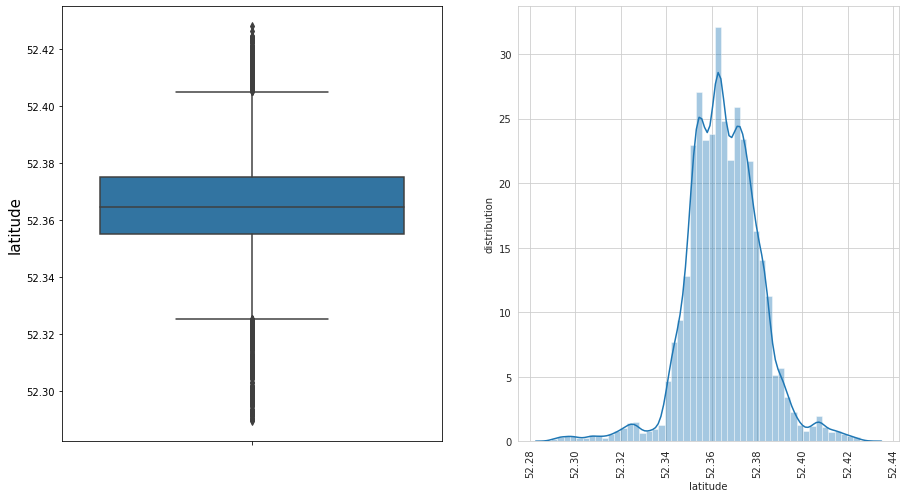

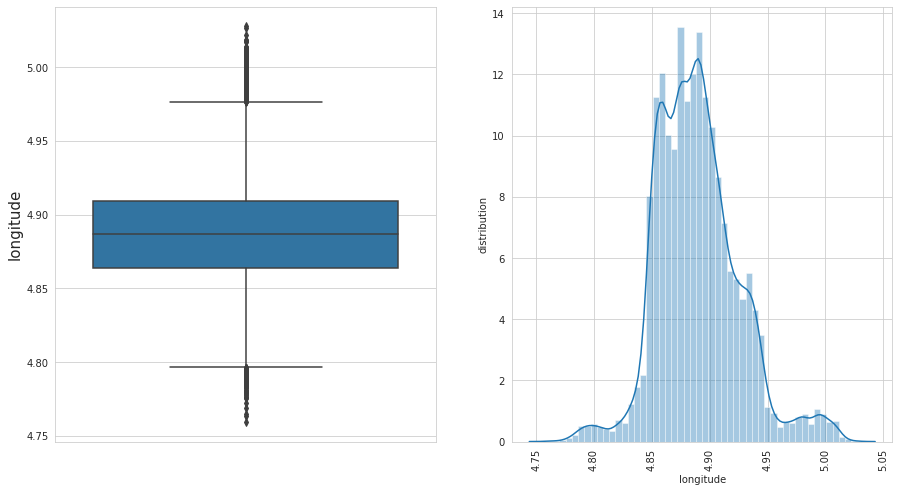

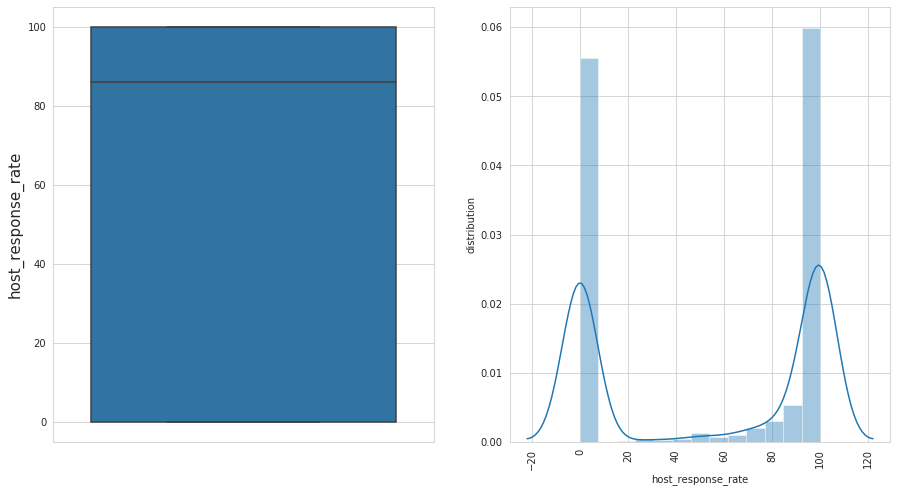

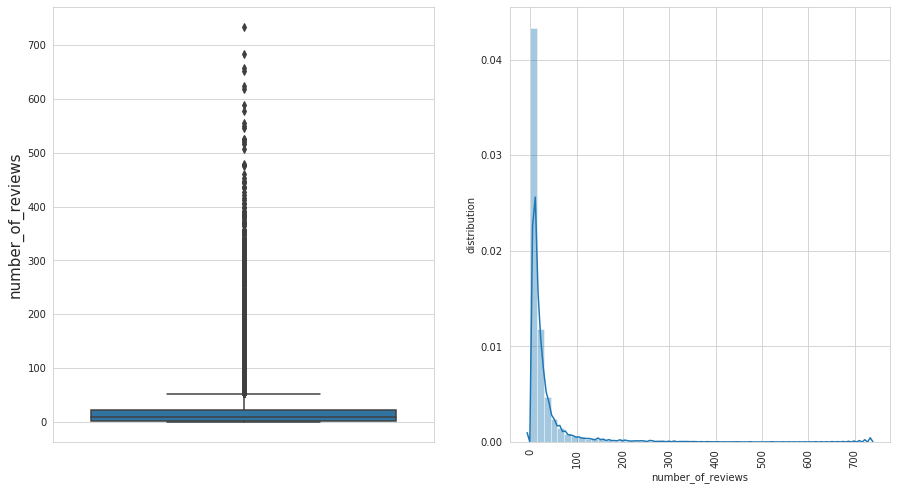

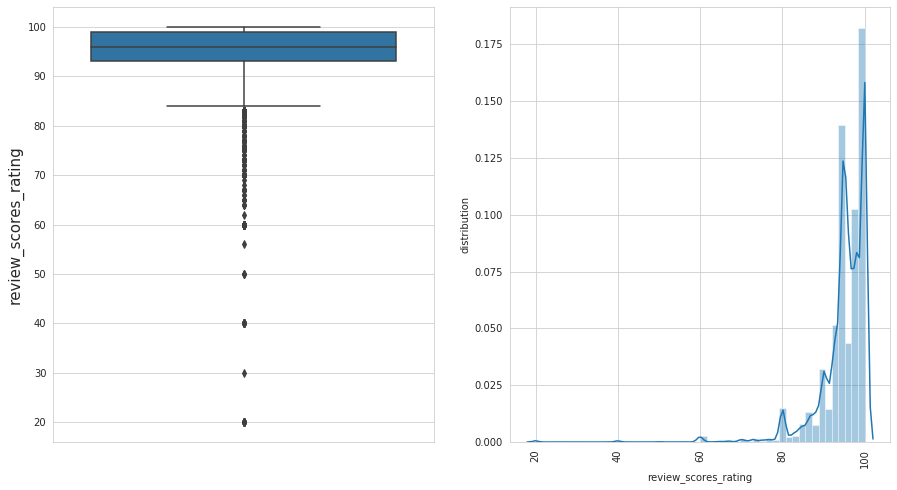

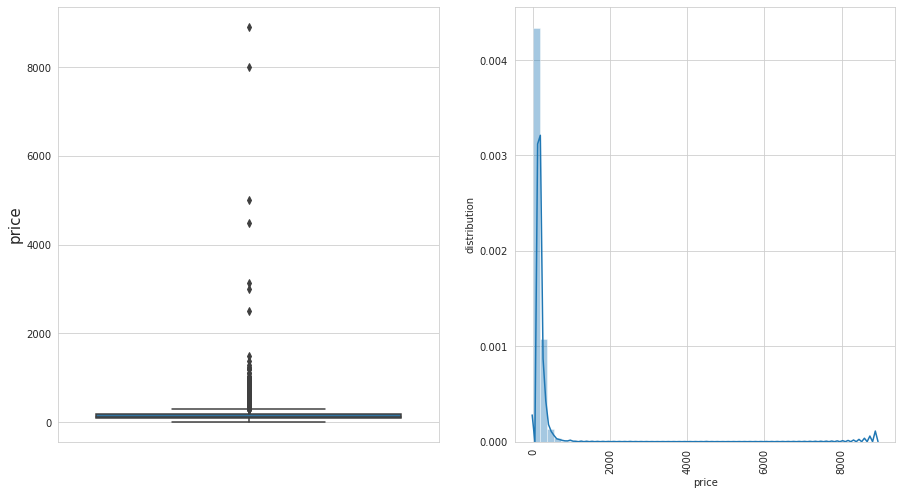

In [45]:
for var in continuous:
    plt.figure(figsize=(15,8))
    plt.subplot(1, 2, 1)
   
    sns.set_style('whitegrid')
    fig = sns.boxplot(y=X_train_p[var])
    fig.set_title('')
    fig.set_ylabel(var,fontsize=15)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(X_train_p[var])
   
    fig.set_ylabel('distribution')
    fig.set_xlabel(var)
    plt.xticks(rotation=90)


    plt.show()

We see there are a lot of outliers which don't let us see the clear distribution of the data

Maybe with discrete features will be better picture on the plot

<Figure size 1080x576 with 0 Axes>

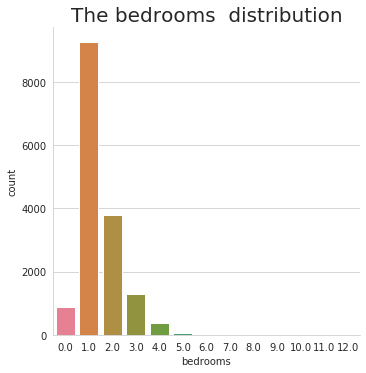

<Figure size 1080x576 with 0 Axes>

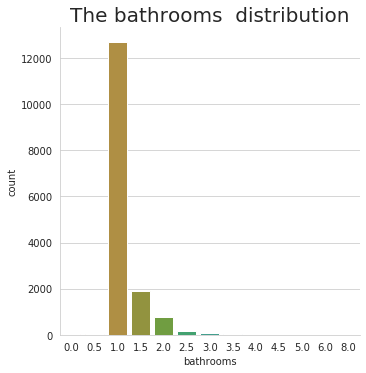

<Figure size 1080x576 with 0 Axes>

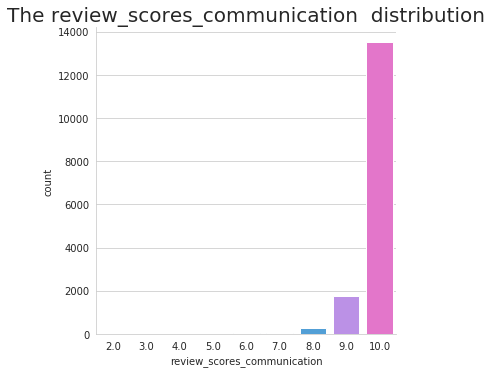

In [46]:
for column in discrete:
    plt.figure(figsize=(15,8))
    fig.set_title(column)
    fig.set_ylabel(column,fontsize=15)
    sns.catplot(x=column, kind="count", palette="husl", data=X_train_p)
    plt.title('The {}  distribution'.format(column), fontSize=20)
    plt.show()

Here also we see big amount of outliers and the main value is concentrated in 3-5 categories on each feature plot

Now the last 2 plots with categorical features:

In [47]:
%matplotlib inline

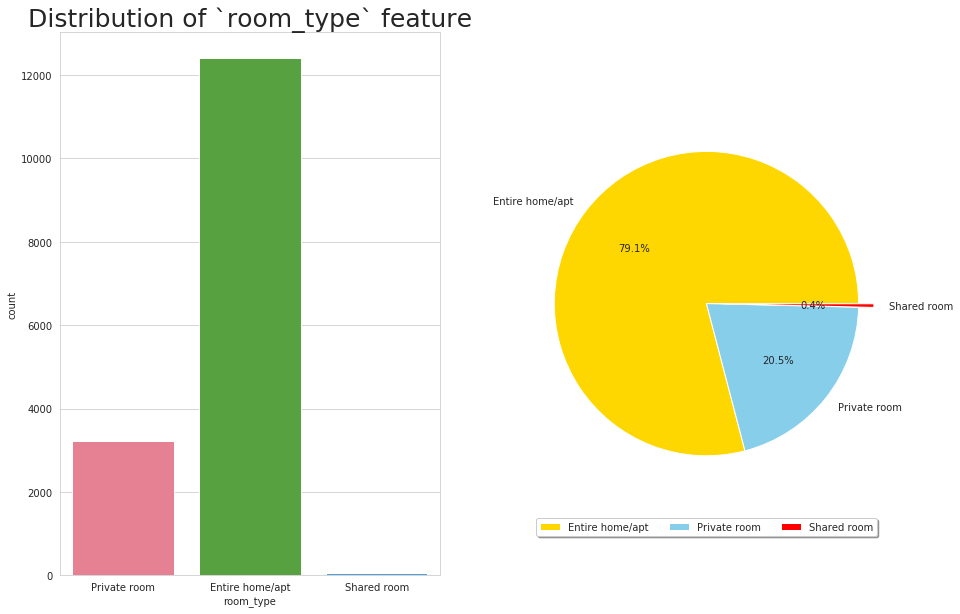

In [48]:
room_type = X_train_p['room_type'].value_counts()

fig = plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot(X_train_p.room_type,palette='husl')
plt.title('Distribution of `room_type` feature', fontsize=25)

plt.subplot(1, 2, 2)
types=['Entire home/apt', 'Private room', 'Shared room']
colors1 = ['gold',  'skyblue', 'red']
explode1 = (0, 0, 0.1)
plt.pie(room_type, labels=types,colors= colors1, explode=explode1, autopct='%1.1f%%')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=3)


plt.show()

1. On this plot it's visible that the most popular type is `Entire home/apt`. It counts 79,1% of all data we have.
2. And only 20.5% of all types is `Private room`
3. I even can't assume who are those people who prefer `Shared room` - 0,4% of our data

And we have last one feature `host_since`, which we have to group befor plot

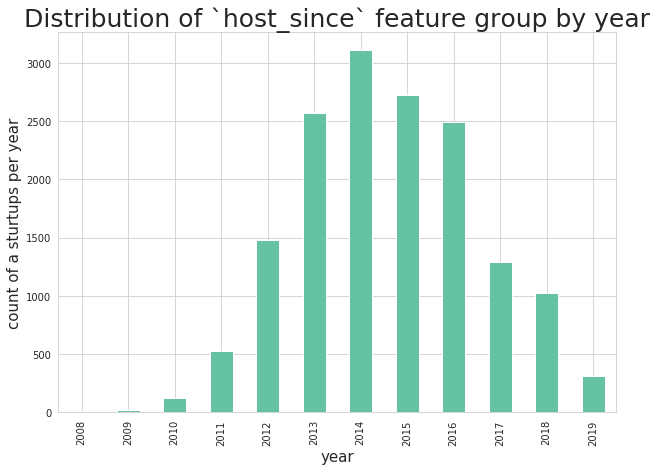

In [49]:
host_since_group = X_train_p['host_since'].groupby([X_train_p.host_since.dt.year]).count()

host_since_group.plot(figsize=(10,7), kind='bar', colormap='Set2')

plt.xlabel('year',fontsize=15)
plt.ylabel('count of a sturtups per year', fontsize=15)
plt.title('Distribution of `host_since` feature group by year', fontsize=25)
plt.show()

In [50]:
host_since_group.describe()

count      12.000000
mean     1307.916667
std      1156.944994
min        10.000000
25%       266.250000
50%      1159.000000
75%      2513.500000
max      3111.000000
Name: host_since, dtype: float64

1. We see that the biggest amount of new hostel start were in 2014 year
2. And 2013,2014,2015 and 2016 years the most productive and have the most competition on the market

##### 6.3 Plot the relationship between all of the features

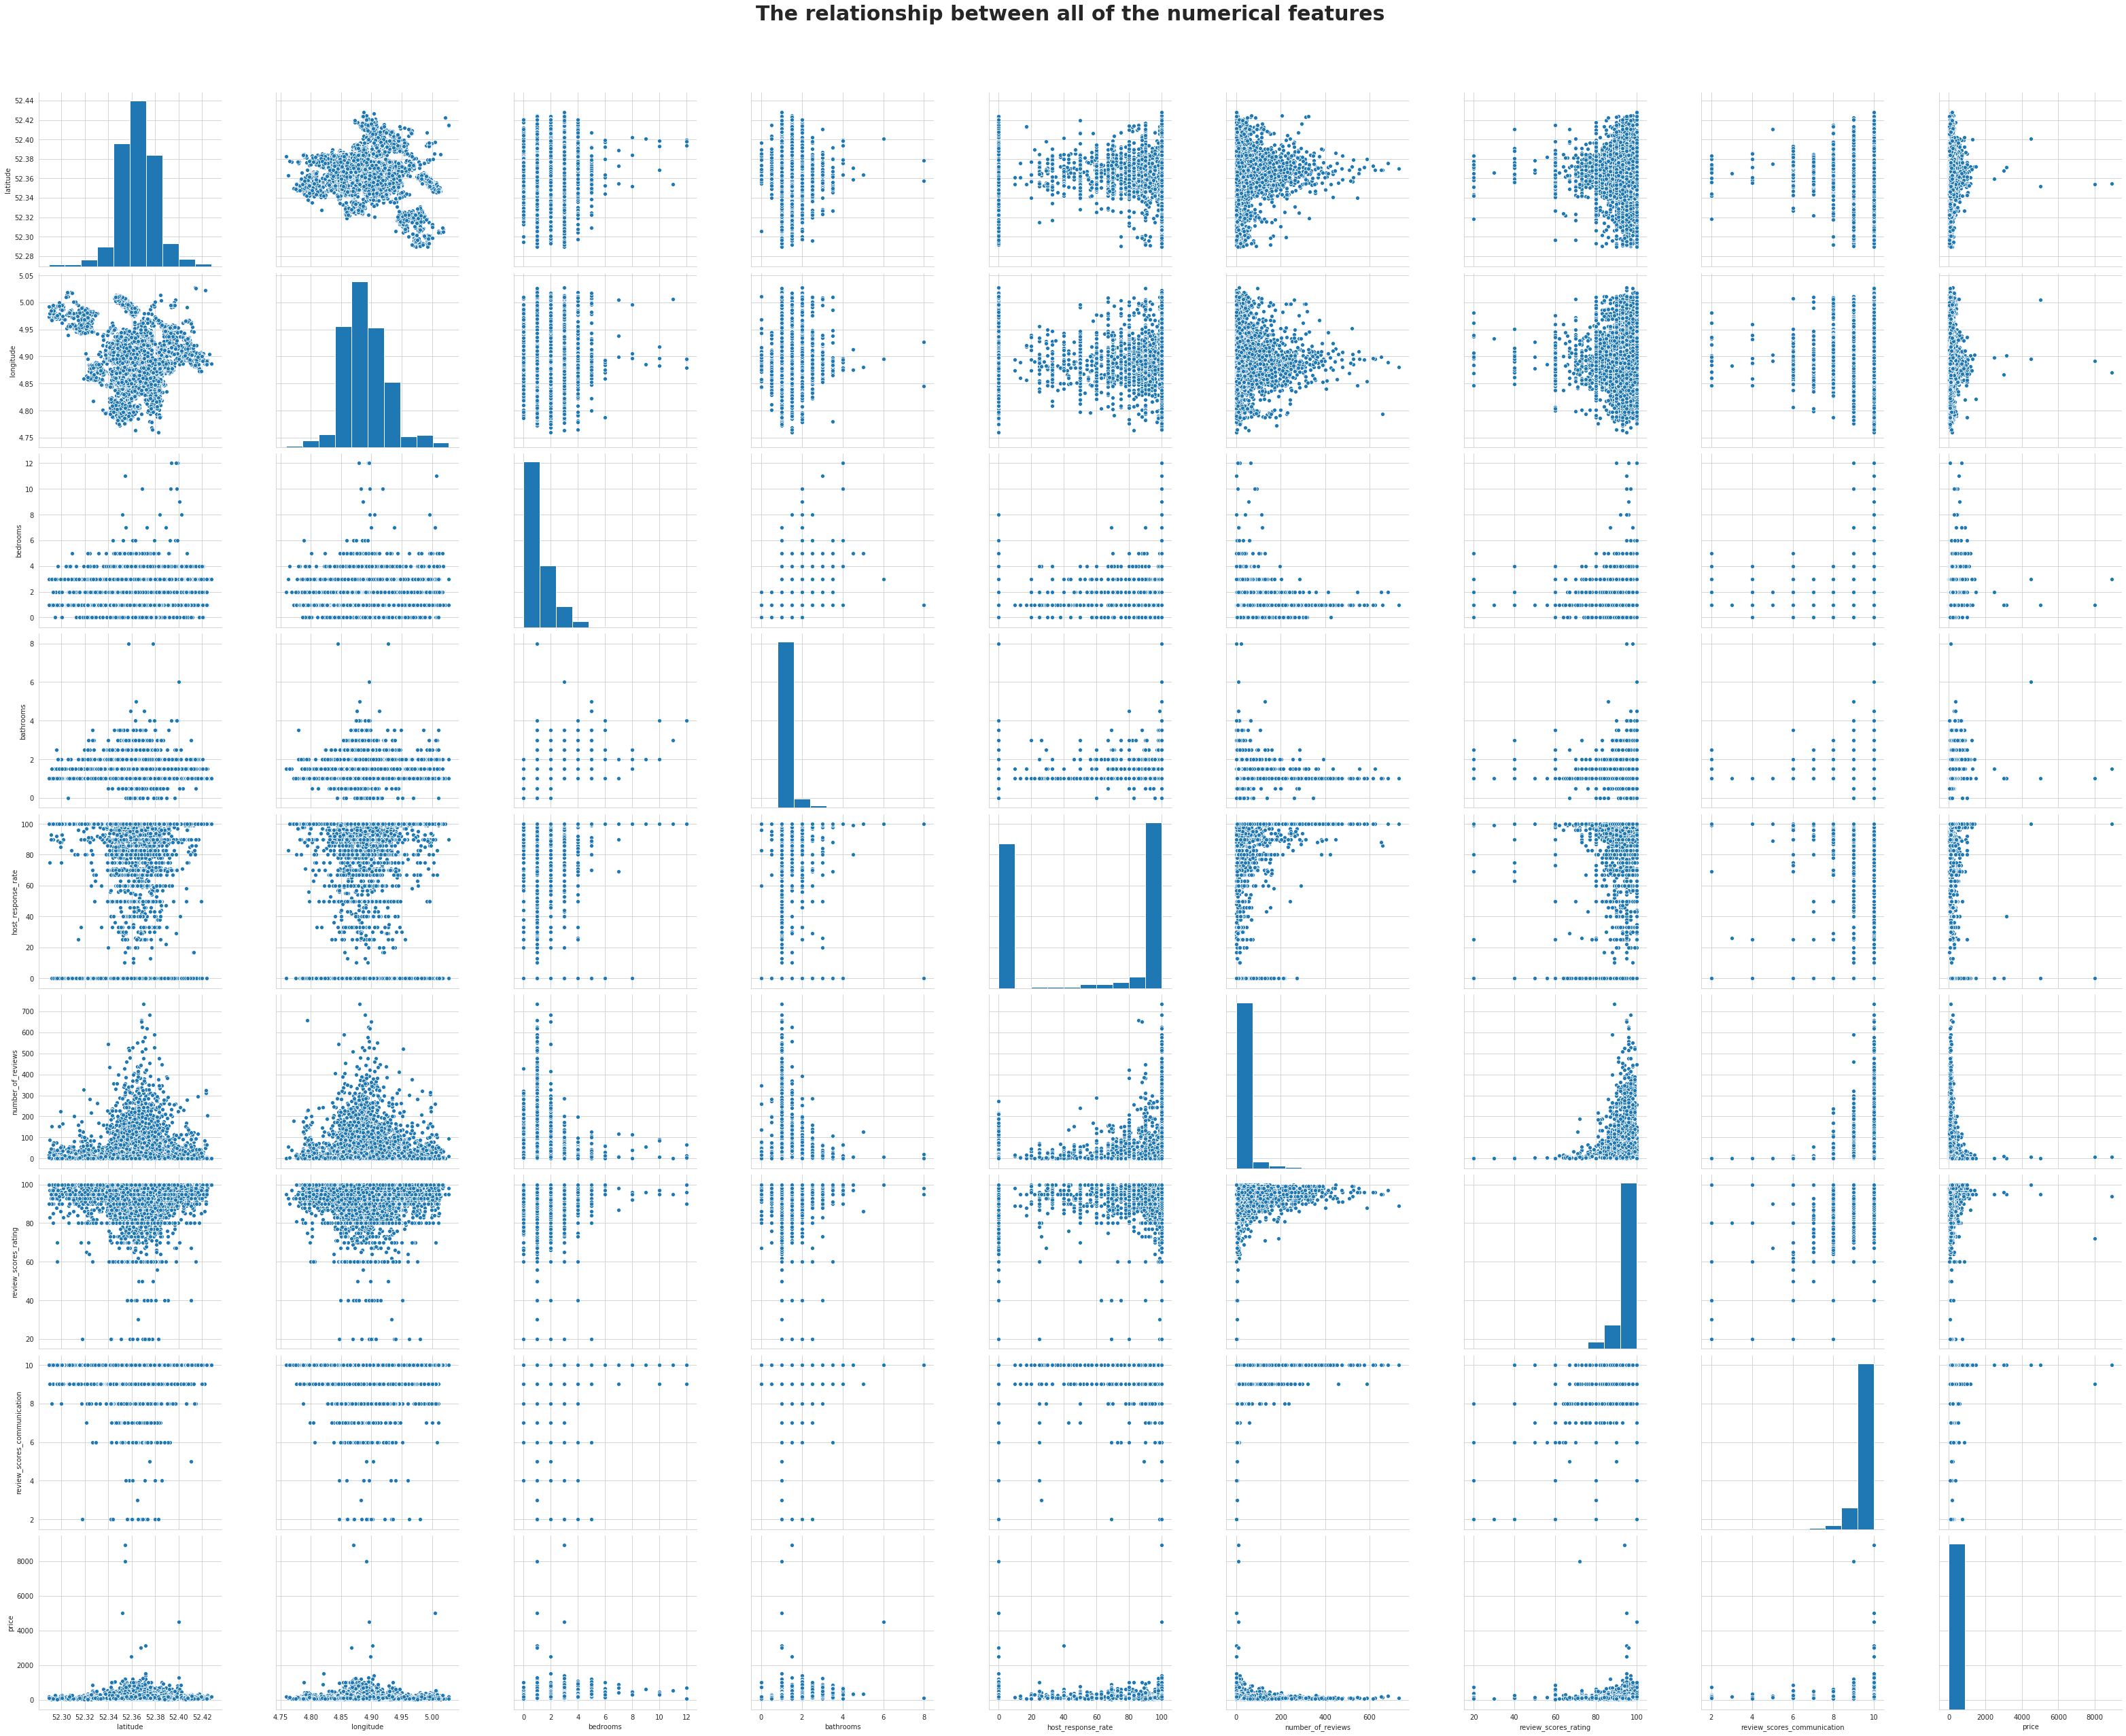

In [51]:
pp = sns.pairplot(X_train_p,height=4, aspect=1.2)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('The relationship between all of the numerical features',fontsize=30, fontweight='bold')
plt.show()
#click on the plot twice to see each plot closer

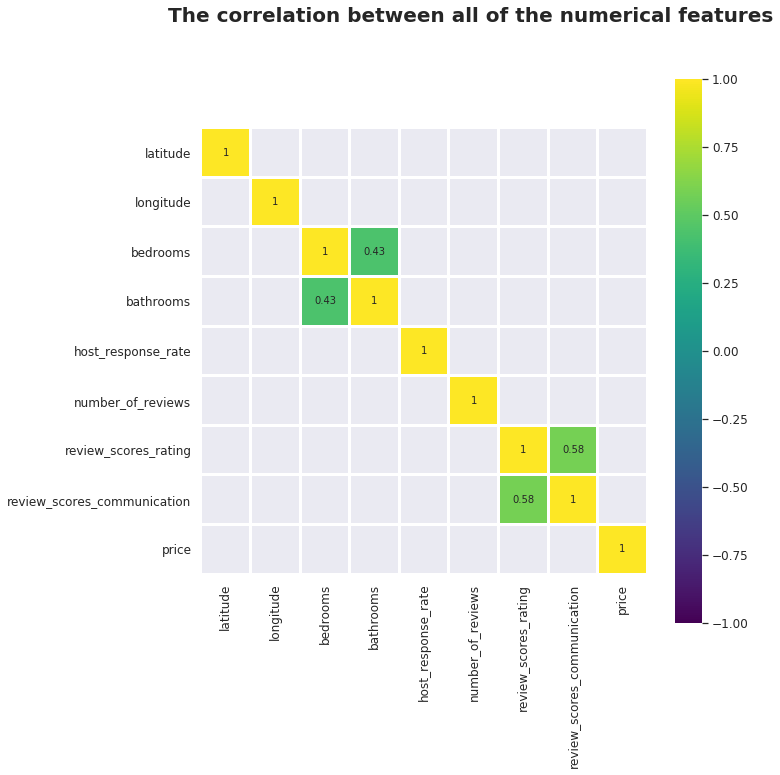

In [52]:
corr = X_train_p.corr()
f = plt.figure(figsize=(10, 10))

sns.set(font_scale=1.1)
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=2,
            annot=True, annot_kws={"size": 10}, square=True)
f.suptitle('The correlation between all of the numerical features',fontsize=20, fontweight='bold')
plt.show()

1. We see that `bathrooms` and `bedrooms` has a positive correlation, we can assume it depents of whole quality of the house and capacity of the house at all
2. And the `review_scores_rating` has a very high positive correlation with `review_scores_communication`. We may assume that these two features duplicating the information about rating, so if we will want to drop one of these columns it won't hurt to the data set at all

Let's see  the common features, which have no sense one without other

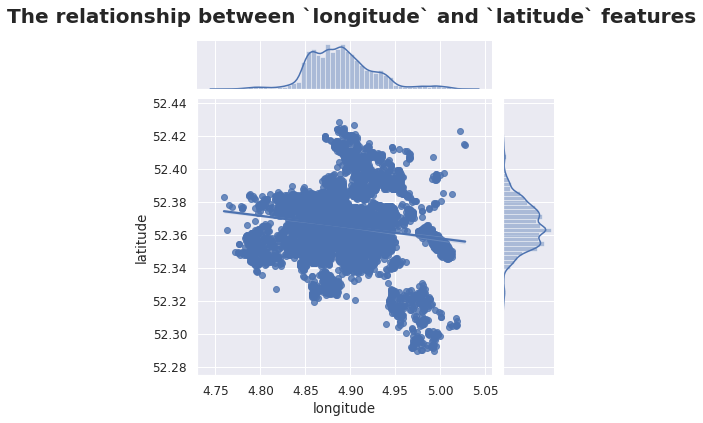

In [53]:
g = sns.jointplot('longitude', 'latitude', data=X_train_p, kind='reg')
g.fig.suptitle('The relationship between `longitude` and `latitude` features',fontsize=20, fontweight='bold')
g.fig.subplots_adjust(top=0.9)

It is interesting to see almost the real map plotting the `latitude` and `latitude`: we could compare it with the real google map next time*

but this time we will drop them only because 


###### 6.4 Plot the relations of all of the features with the dependent variable. 
     No need to add new features. Leave only interesting plots
 

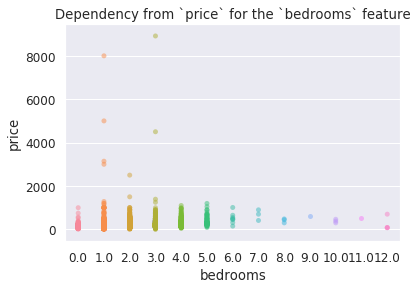

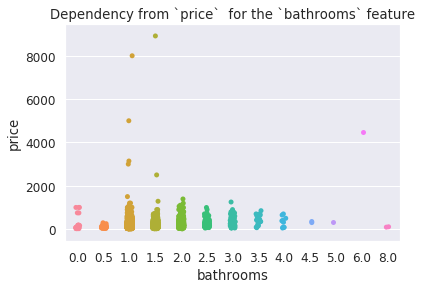

In [54]:
fig1= plt.subplots()

plt.title('Dependency from `price` for the `bedrooms` feature')
sns.stripplot(x="bedrooms", y="price", \
              data=X_train_p.dropna(subset=["price"]), \
              alpha = 0.5, jitter=False)
plt.show()

plt.title('Dependency from `price`  for the `bathrooms` feature')
sns.stripplot(x="bathrooms", y="price", \
              data=X_train_p.dropna(subset=["price"]), \
              )
plt.show()


Here we see that we assumed eirlier: duplicating of the data by features `bedrooms` and `bathrooms`
1. The most expensive  houses with `bathrooms` from 1 to 2 (not counting outliers in position 1 and 5)
2. The most expensive houses with `bedrooms` from 1 to 2(not counting outliers in positions 1 and 5.5)

so we can drop later one of these columns like duplicating info

There is one another interesting feature to see on the plot of correlation with `price` feature:

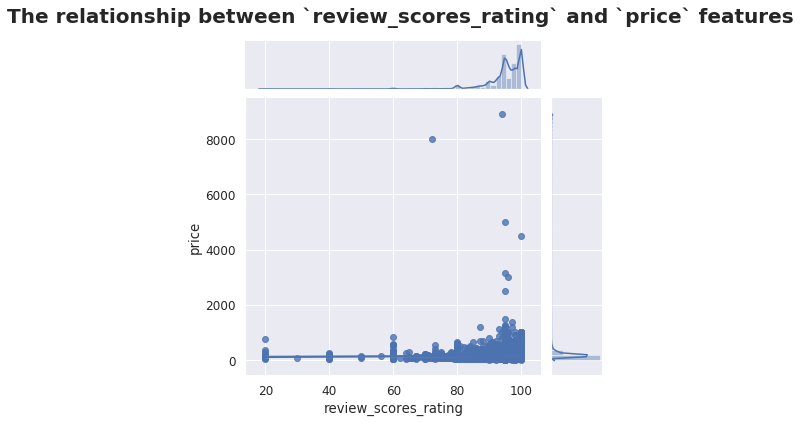

In [55]:
g = sns.jointplot('review_scores_rating','price', data=X_train_p, kind='reg')
g.fig.suptitle('The relationship between `review_scores_rating` and `price` features',fontsize=20, fontweight='bold')
g.fig.subplots_adjust(top=0.9)

We see here linear correlation of `review_scores_rating` and `price`

Almost all `review_scores_rating` are in the diapasone of 70-100 and in `price` diapasone it lays higher than mean price

Again, it tells us that good quality has a linear dependendcy/correlation with `price`

And here we will look on the `time` and `price` - the eternal dependent features on the real estate market:

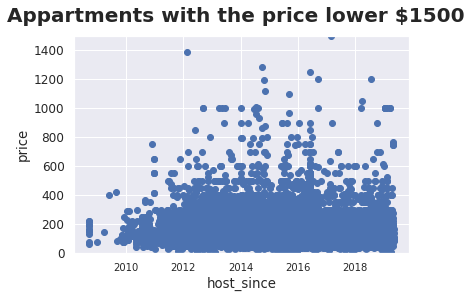

In [56]:
fig, ax = plt.subplots()
plt.plot_date(X_train_p.host_since, X_train_p.price)
ax.xaxis.set_tick_params( labelsize=10)
ax.set_ylim(0, 1500)
plt.xlabel('host_since')
plt.ylabel('price')
fig.suptitle('Appartments with the price lower $1500',fontsize=20, fontweight='bold')
plt.show()

1. Here we see that main tendention of the price through the years is holding well on the position not overlaping point `500`-`600$` (without counting outliers) and the mean price since `2010 year` is about `200`-`300$`
2. Of cause we have expencive real estate here, but only outliers in data are  able to break the main peacture of the market
3. There is no strong dependency for price in this period, so we can drop `time` feature

#### 7. Remove columns that are redundant / are not important / are duplicated / are correlated - explain why you selected the features that way.

Now summarize what we will drop:
 1. `bathrooms` as a duplicating info feature of `bedrooms` feature. They have a correlation on each other
 2. `review_scores_communication` by the same reason as `bathrooms` feature, we can take the same info in the `host_response_rate` feature
 3.  and `host_since` feature beacause it doesn't affects the price at all

In [57]:
X_train = X_train_p.drop(['bathrooms','review_scores_communication','host_since'], axis=1)

In [58]:
X_train.columns

Index(['latitude', 'longitude', 'room_type', 'bedrooms', 'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'price'],
      dtype='object')

## Part II:
### On your train set alone
 


#### 1. Transform your categorical features - explain what your considerations were in ragards to which method you chose.


In [59]:
display('The SHAPE of out data set BEFORE TRANSFORMATION is {}'.format(X_train.shape))

'The SHAPE of out data set BEFORE TRANSFORMATION is (15695, 8)'

Let's remind us what do we have from categorical features:

In [60]:
numerical_columns = X_train.describe().columns
categorical_columns = X_train.drop(numerical_columns, axis=1).columns
describe_categorical_values(X_train, non_interesting_columns=numerical_columns, num_categories=3)

,0,1,2
room_type,Entire home/apt: 79%,Private room: 21%,Shared room: 0%


Oh! So we have the only one categorical feature `room_type`

Let's convert it to dummies with  new columns named by the unique value of `room_type` feature:
1. `Entire home/apt`,
2. `Private room`,
3. `Shared room`,

In [61]:
X_train = pd.get_dummies(X_train, columns = ['room_type'], prefix = '', prefix_sep ='' )
X_train.head(3)

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,Entire home/apt,Private room,Shared room
12384,52.37425,4.82007,1.0,100.0,23,95.0,95.0,0,1,0
14872,52.35326,4.89102,3.0,80.0,4,95.0,285.0,1,0,0
3245,52.38235,4.88150,2.0,0.0,23,100.0,150.0,1,0,0


We have to rename the columns according to convention of all data set:

In [62]:
rooms = {"Entire home/apt": "entire_home_apt", "Private room": "private_room",
                             "Shared room":"shared_room"}
X_train = X_train.rename(columns=rooms)
X_train.head(3)

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room
12384,52.37425,4.82007,1.0,100.0,23,95.0,95.0,0,1,0
14872,52.35326,4.89102,3.0,80.0,4,95.0,285.0,1,0,0
3245,52.38235,4.88150,2.0,0.0,23,100.0,150.0,1,0,0


#### 2. What is the data shape after the transformation? 


In [63]:
display('The SHAPE of out data set AFTER TRANSFORMATION is {}'.format(X_train.shape))

'The SHAPE of out data set AFTER TRANSFORMATION is (15695, 10)'

We got the shape bigger for 2 columns:
1. The `room_type` disappeared
2. Appeared 3 new columns according the values of `room_type` column

#### 3. Look at the distribution of all the new features that were added / transformed by you 

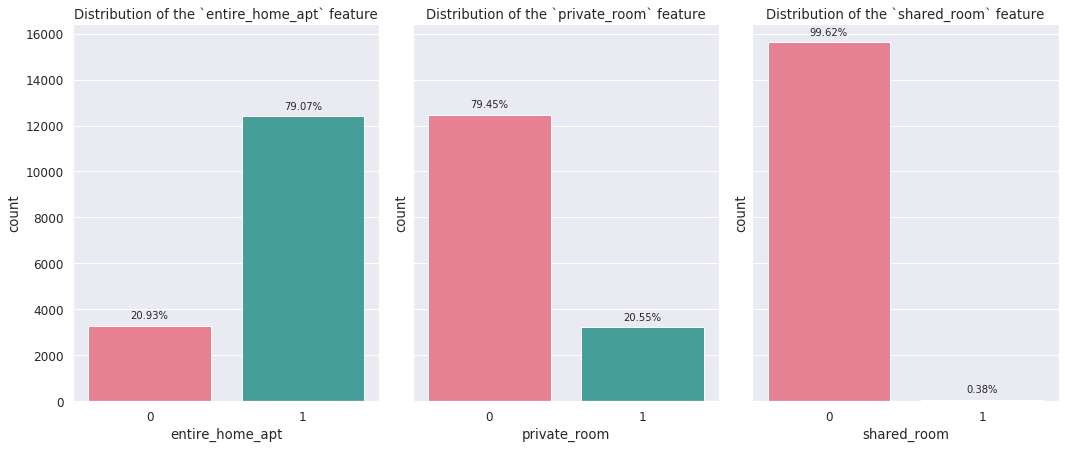

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,5), sharey=True)

sns.countplot(x=X_train.entire_home_apt,data=X_train ,palette='husl', ax=ax1)
sns.countplot(x=X_train.private_room,data=X_train ,palette='husl', ax=ax2)
sns.countplot(x=X_train.shared_room,data=X_train ,palette='husl', ax=ax3)

for d,t in zip((ax1,ax2,ax3),('`entire_home_apt`','`private_room`','`shared_room`')):
    d.set_title('Distribution of the {} feature'.format(t))
    plt.tight_layout()
    for p in d.patches:
        d.annotate('{}%'.format(round(p.get_height()/len(X_train.entire_home_apt)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2., \
                        p.get_height()), \
                       ha = 'center', \
                       va = 'center', \
                       xytext = (0, 10), \
                       textcoords = 'offset points',\
                       size = 10)
fig.subplots_adjust(top=1.2)
plt.show()


##### 3.1 What can we say about it? 

The distribution is the same as it shown upper here in the 1st part of the task:
1. `entire_home_apt` is more preferebl on the market	 but now we able to see that the percentage of `not chosen` group: 20,93% are the rest two types of rooms : `private_room` and 	`shared_room`
2. Or we able to say that 99,62% on the market are rooms with `entire_home_apt`and `private_room` type

##### 3.2 Can you spot any redundant features (features with very low cardinality or super un-even distribution, long tail)? 

Yes, in the feature `room_type` was a long tail/ many outliers. So in  new 3 features will be the same situation

Let's check

##### 3.3 Show it.


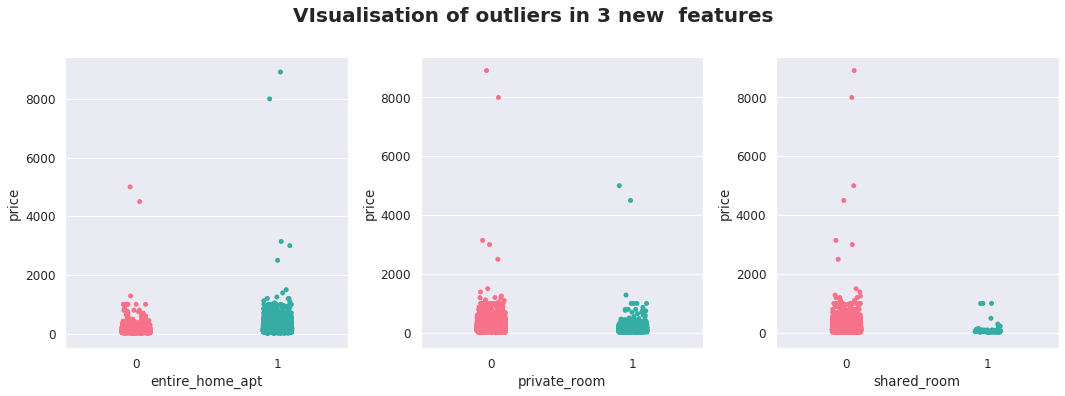

In [65]:
figure, axes = plt.subplots(1, 3,figsize=(15,5))

sns.stripplot('entire_home_apt','price', data = X_train, palette='husl', jitter=True, ax=axes[0])
sns.stripplot('private_room', 'price',data=X_train ,palette='husl', jitter=True, ax=axes[1])
sns.stripplot('shared_room','price',data=X_train ,palette='husl', jitter=True, ax=axes[2])

figure.suptitle('VIsualisation of outliers in 3 new  features',fontsize=20, fontweight='bold',y=1.1)
figure.tight_layout()   

plt.show()

This plot shows us the distribution ot `room types` with dependensy on `price` feature

We can make small zoom, to see the main part of the real estate market with `room types`. All we need, just to make top border of the price lowe

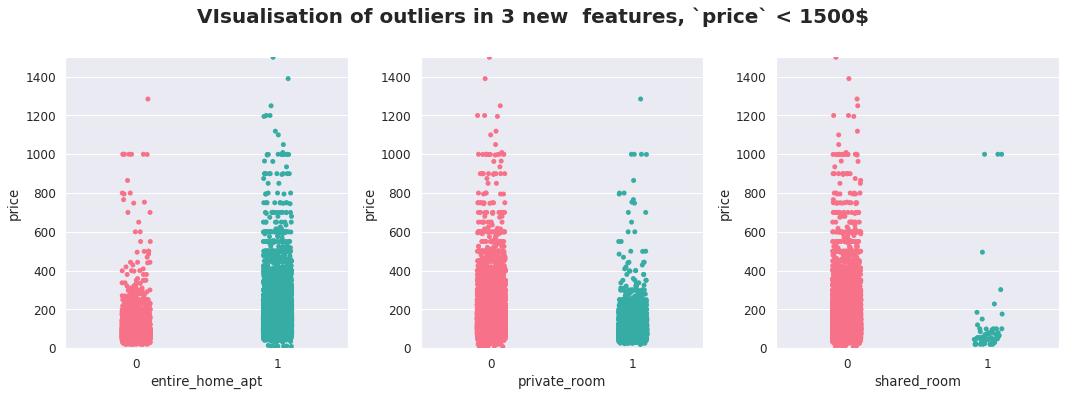

In [66]:
figure, axes = plt.subplots(1, 3,figsize=(15,5))
for ax in axes:
    ax.set_ylim(0, 1500)
sns.stripplot('entire_home_apt','price', data = X_train, palette='husl', jitter=True, ax=axes[0])
sns.stripplot('private_room', 'price',data=X_train ,palette='husl', jitter=True, ax=axes[1])
sns.stripplot('shared_room','price',data=X_train ,palette='husl', jitter=True, ax=axes[2])

figure.suptitle('VIsualisation of outliers in 3 new  features, `price` < 1500$',fontsize=20, fontweight='bold',y=1.1)
figure.tight_layout()   

plt.show()

Such picture shows more real situation on the market

#### 4. Take care of the features you mentioned in q7, and explain your steps.


Well, all we wanted to drop or remove in `X_train set` until now already done in the first part

If we will try now to remove outliers, we can loose more than 5% of the data only because we didn't made it in the begining with the whole data set before splitting (i checked with z-score and lost 7.5% from `X_train` and 10% from `X_test`). 

So we are continue

 
### On your test set
 

#### 5. Transform the categorical features in the test set, according to the train set. 


At first we will drop the colums which we droped in the part I

In [67]:
X_test = X_test_p.drop(['bathrooms','review_scores_communication','host_since'], axis=1)
X_test.columns

Index(['latitude', 'longitude', 'room_type', 'bedrooms', 'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'price'],
      dtype='object')

Check the shape before transformation

In [68]:
display('The SHAPE of out data set BEFORE TRANSFORMATION is {}'.format(X_test.shape))

'The SHAPE of out data set BEFORE TRANSFORMATION is (3924, 8)'

Definding the numerical and non-numerical columns

In [69]:
numerical_columns = X_test.describe().columns
categorical_columns = X_test.drop(numerical_columns, axis=1).columns
describe_categorical_values(X_test, non_interesting_columns=numerical_columns, num_categories=3)

,0,1,2
room_type,Entire home/apt: 79%,Private room: 21%,Shared room: 0%


Transform to dummies the only one categorical feature:

In [70]:
X_test = pd.get_dummies(X_test, columns = ['room_type'], prefix = '', prefix_sep ='' )
X_test.head(3)

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,Entire home/apt,Private room,Shared room
10140,52.35897,4.85538,2.0,100.0,24,97.0,250.0,1,0,0
15582,52.37165,4.89600,1.0,94.0,71,92.0,125.0,0,1,0
16246,52.35147,4.88928,2.0,0.0,6,100.0,200.0,1,0,0


Rename the columns with the same names as in `X_train` set

In [71]:
rooms = {"Entire home/apt": "entire_home_apt", "Private room": "private_room",
                             "Shared room":"shared_room"}
X_test = X_test.rename(columns=rooms)
X_test.head(3)

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room
10140,52.35897,4.85538,2.0,100.0,24,97.0,250.0,1,0,0
15582,52.37165,4.89600,1.0,94.0,71,92.0,125.0,0,1,0
16246,52.35147,4.88928,2.0,0.0,6,100.0,200.0,1,0,0


Check the shape after transformation:

In [72]:
display('The SHAPE of out data set AFTER TRANSFORMATION is {}'.format(X_test.shape))

'The SHAPE of out data set AFTER TRANSFORMATION is (3924, 10)'

#### Make sure the test set now has no more and  no less features than the train set, and that they match in name.
##### check the shapes:

In [73]:
X_train.shape, X_test.shape

((15695, 10), (3924, 10))

The shape seems the same (the number of columns)

##### proportion check:

In [74]:
print('Cleaned with z-score data sets:',
      '\nTrain set is:', 100*round(len(X_train)/len(rel_df),2), '%'\
      '\nTest set is:', 100*round(len(X_test)/len(rel_df), 2), '%')

Cleaned with z-score data sets: 
Train set is: 80.0 %
Test set is: 20.0 %


The proportions are also ok

##### columns check:

In [75]:
X_train.columns, X_test.columns

(Index(['latitude', 'longitude', 'bedrooms', 'host_response_rate',
        'number_of_reviews', 'review_scores_rating', 'price', 'entire_home_apt',
        'private_room', 'shared_room'],
       dtype='object'),
 Index(['latitude', 'longitude', 'bedrooms', 'host_response_rate',
        'number_of_reviews', 'review_scores_rating', 'price', 'entire_home_apt',
        'private_room', 'shared_room'],
       dtype='object'))

And columns are the same


## Part III:
### On your train set alone



#### 1. Transform your continuous features according to the 3 methods (choose different features for each method): 


Let's also look at the range of the continuous variables:

In [76]:
X_train.describe().loc[['min', 'max'], :]

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room
min,52.28927,4.75943,0.0,0.0,0.0,20.0,8.0,0.0,0.0,0.0
max,52.42803,5.02769,12.0,100.0,733.0,100.0,8915.0,1.0,1.0,1.0


As we can see, the ranges vary greatly. This may not be in the favor of our machine learning models.

Let's define the numerical features that we have in a different way:

In [77]:
X_train._get_numeric_data().head(1)


,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room
12384,52.37425,4.82007,1.0,100.0,23,95.0,95.0,0,1,0


Here we have the values of all numerical columns in the our data set:

In [78]:
X_train._get_numeric_data().values

array([[52.37425,  4.82007,  1.     , ...,  0.     ,  1.     ,  0.     ],
       [52.35326,  4.89102,  3.     , ...,  1.     ,  0.     ,  0.     ],
       [52.38235,  4.8815 ,  2.     , ...,  1.     ,  0.     ,  0.     ],
       ...,
       [52.3629 ,  4.93392,  2.     , ...,  1.     ,  0.     ,  0.     ],
       [52.39121,  4.87845,  2.     , ...,  1.     ,  0.     ,  0.     ],
       [52.35974,  4.98183,  4.     , ...,  1.     ,  0.     ,  0.     ]])

##### 1.1 normalization:


Let's take feature for normalisation: `latitude`, `longitude`

In [79]:
geopoint = X_train[['latitude','longitude']]
geopoint

,latitude,longitude
12384,52.37425,4.82007
14872,52.35326,4.89102
3245,52.38235,4.88150
17907,52.31144,4.95773
18920,52.35446,4.88144
...,...,...
11284,52.36331,4.89748
11964,52.36170,4.86503
5390,52.36290,4.93392
860,52.39121,4.87845


The values of our chosen columns are:

In [80]:
geopoint._get_numeric_data().values

array([[52.37425,  4.82007],
       [52.35326,  4.89102],
       [52.38235,  4.8815 ],
       ...,
       [52.3629 ,  4.93392],
       [52.39121,  4.87845],
       [52.35974,  4.98183]])

Let's see how far the geopoints are from the center

At first we will try `StandardScaler()` for transformation and normalisation

In [81]:
geopoint_normal= preprocessing.StandardScaler().fit(geopoint).transform(geopoint)
geopoint_normal

array([[ 0.55557567, -1.93796289],
       [-0.7461495 ,  0.04121519],
       [ 1.05790887, -0.22434895],
       ...,
       [-0.14831097,  1.23792752],
       [ 1.60737457, -0.30942989],
       [-0.34428294,  2.57439576]])

Now we will add new columns into our `X_train` data set 

In [82]:
geopoint_normal = pd.DataFrame(geopoint_normal, columns = ['latitude', 'longitude'])
X_train['latitude_norm'] = geopoint_normal.latitude.tolist()
X_train['longitude_norm'] = geopoint_normal.longitude.tolist()

Small check for null

In [83]:
X_train.longitude_norm.isna().sum(), geopoint_normal.longitude.isna().sum()

(0, 0)

and visualise the data frame

In [84]:
X_train.head()

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room,latitude_norm,longitude_norm
12384,52.37425,4.82007,1.0,100.0,23,95.00000,95.0,0,1,0,0.555576,-1.937963
14872,52.35326,4.89102,3.0,80.0,4,95.00000,285.0,1,0,0,-0.746150,0.041215
3245,52.38235,4.88150,2.0,0.0,23,100.00000,150.0,1,0,0,1.057909,-0.224349
17907,52.31144,4.95773,3.0,80.0,4,90.00000,80.0,1,0,0,-3.339677,1.902117
18920,52.35446,4.88144,1.0,36.0,0,94.95681,275.0,1,0,0,-0.671730,-0.226023


Now we would like to see how were looking our chosen features before the transformation

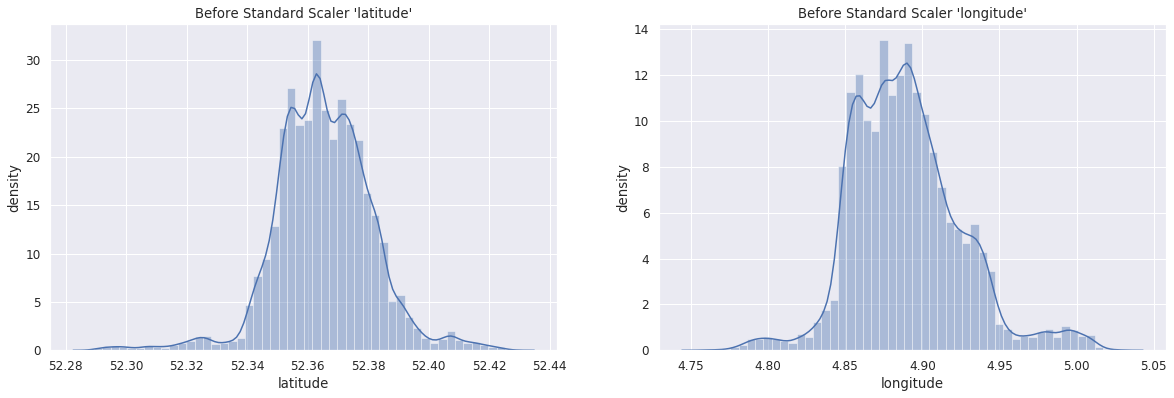

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title("Before Standard Scaler 'latitude'")
sns.distplot(X_train.latitude, ax=ax1)
ax1.set(ylabel='density')

ax2.set_title("Before Standard Scaler 'longitude'")
sns.distplot(X_train.longitude, ax=ax2)
ax2.set(ylabel='density')

plt.show()

And here the common plot for `latitude/longitude` distribution before normalisation and after


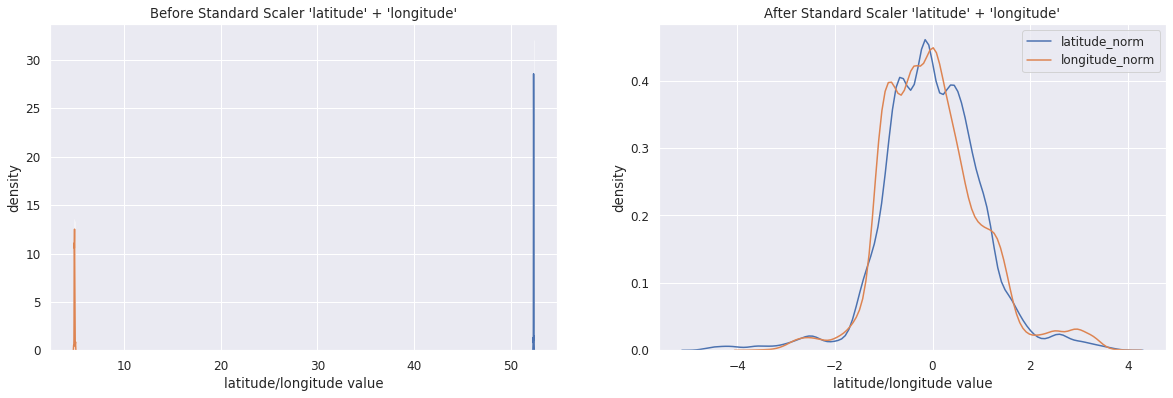

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title("Before Standard Scaler 'latitude' + 'longitude'")
sns.distplot(X_train.latitude, ax=ax1)
sns.distplot(X_train.longitude, ax=ax1)
ax1.set(xlabel='latitude/longitude value',ylabel='density')


ax2.set_title("After Standard Scaler 'latitude' + 'longitude'")
sns.kdeplot(X_train.latitude_norm, ax=ax2)
sns.kdeplot(X_train.longitude_norm, ax=ax2)
ax2.set(xlabel='latitude/longitude value',ylabel='density')

plt.show()

All two features values now are centered around zero

Let's see what will give us the `MinMax Scaler` with the same features

In [87]:
geopoint_min_max= preprocessing.MinMaxScaler().fit(geopoint).transform(geopoint)
geopoint_min_max


array([[0.61242433, 0.22604936],
       [0.46115595, 0.49053157],
       [0.6707985 , 0.45504361],
       ...,
       [0.53062842, 0.65045105],
       [0.73464975, 0.44367405],
       [0.50785529, 0.82904645]])

In [88]:
geopoint_min_max = pd.DataFrame(geopoint_min_max, columns = ['latitude', 'longitude'])
X_train['latitude_min_max'] = geopoint_min_max.latitude.tolist()
X_train['longitude_min_max'] = geopoint_min_max.longitude.tolist()

In [89]:
X_train.longitude_min_max.isna().sum(), geopoint_min_max.longitude.isna().sum()

(0, 0)

In [90]:
X_train.head()

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room,latitude_norm,longitude_norm,latitude_min_max,longitude_min_max
12384,52.37425,4.82007,1.0,100.0,23,95.00000,95.0,0,1,0,0.555576,-1.937963,0.612424,0.226049
14872,52.35326,4.89102,3.0,80.0,4,95.00000,285.0,1,0,0,-0.746150,0.041215,0.461156,0.490532
3245,52.38235,4.88150,2.0,0.0,23,100.00000,150.0,1,0,0,1.057909,-0.224349,0.670799,0.455044
17907,52.31144,4.95773,3.0,80.0,4,90.00000,80.0,1,0,0,-3.339677,1.902117,0.159772,0.739208
18920,52.35446,4.88144,1.0,36.0,0,94.95681,275.0,1,0,0,-0.671730,-0.226023,0.469804,0.454820


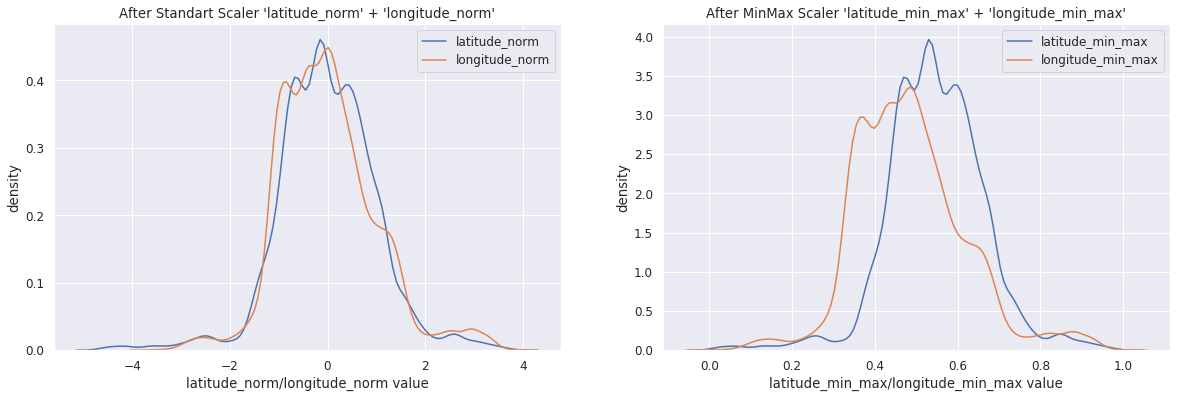

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title("After Standart Scaler 'latitude_norm' + 'longitude_norm'")
sns.kdeplot(X_train.latitude_norm, ax=ax1)
sns.kdeplot(X_train.longitude_norm, ax=ax1)
ax1.set(xlabel='latitude_norm/longitude_norm value',ylabel='density')


ax2.set_title("After MinMax Scaler 'latitude_min_max' + 'longitude_min_max'")
sns.kdeplot(X_train.latitude_min_max, ax=ax2)
sns.kdeplot(X_train.longitude_min_max, ax=ax2)
ax2.set(xlabel='latitude_min_max/longitude_min_max value',ylabel='density')

plt.show()

Notice that the skewness of the distribution is maintained but the 2 distributions are brought into the same scale so that they overlap.

In fact we have outliers in our data so it vill be reasonable to use RobustScaler

It uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rather than the min-max, so that it is robust to outliers.

Let us see the boxplot of original features at first:

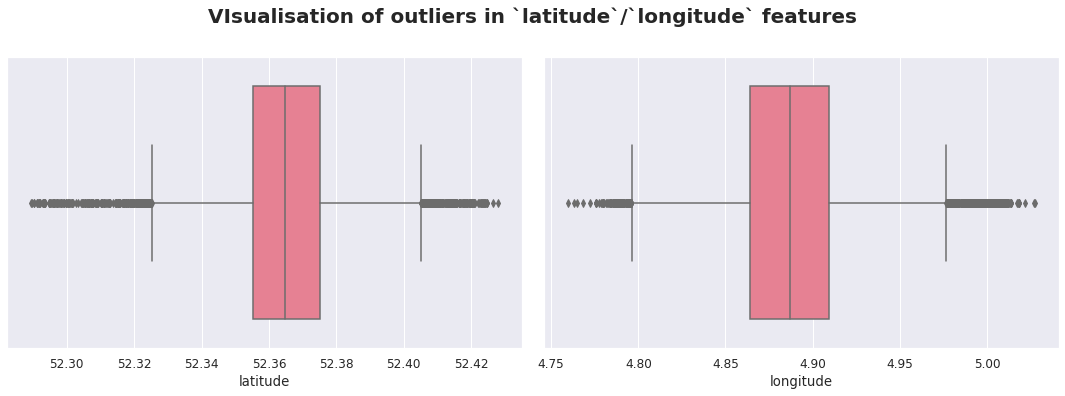

In [92]:
figure, axes = plt.subplots(1, 2,figsize=(15,5))

sns.boxplot('latitude', data = X_train, palette='husl', ax=axes[0])
sns.boxplot('longitude',data=X_train ,palette='husl', ax=axes[1])

figure.suptitle('VIsualisation of outliers in `latitude`/`longitude` features',fontsize=20, fontweight='bold',y=1.1)
figure.tight_layout()   

plt.show()

We see outliers on the plot, so let's check how `RobustScaler()` will manage with normalisation of the data

In [93]:
geopoint_rob = preprocessing.RobustScaler().fit(geopoint).transform(geopoint)
geopoint_rob

array([[ 0.48370927, -1.48245224],
       [-0.56842105,  0.09351399],
       [ 0.88972431, -0.11794758],
       ...,
       [-0.08521303,  1.04642381],
       [ 1.33383459, -0.18569525],
       [-0.24360902,  2.1106175 ]])

Now add new colums into data set 

In [94]:
geopoint_rob = pd.DataFrame(geopoint_rob, columns = ['latitude', 'longitude'])
X_train['latitude_rob'] = geopoint_rob.latitude.tolist()
X_train['longitude_rob'] = geopoint_rob.longitude.tolist()

Check for nulls

In [95]:
X_train.longitude_rob.isna().sum(), geopoint_rob.longitude.isna().sum()

(0, 0)

Visual check of the data frame

In [96]:
X_train.head()

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room,latitude_norm,longitude_norm,latitude_min_max,longitude_min_max,latitude_rob,longitude_rob
12384,52.37425,4.82007,1.0,100.0,23,95.00000,95.0,0,1,0,0.555576,-1.937963,0.612424,0.226049,0.483709,-1.482452
14872,52.35326,4.89102,3.0,80.0,4,95.00000,285.0,1,0,0,-0.746150,0.041215,0.461156,0.490532,-0.568421,0.093514
3245,52.38235,4.88150,2.0,0.0,23,100.00000,150.0,1,0,0,1.057909,-0.224349,0.670799,0.455044,0.889724,-0.117948
17907,52.31144,4.95773,3.0,80.0,4,90.00000,80.0,1,0,0,-3.339677,1.902117,0.159772,0.739208,-2.664662,1.575300
18920,52.35446,4.88144,1.0,36.0,0,94.95681,275.0,1,0,0,-0.671730,-0.226023,0.469804,0.454820,-0.508271,-0.119280


All checks are fine

Now we able to plot our result

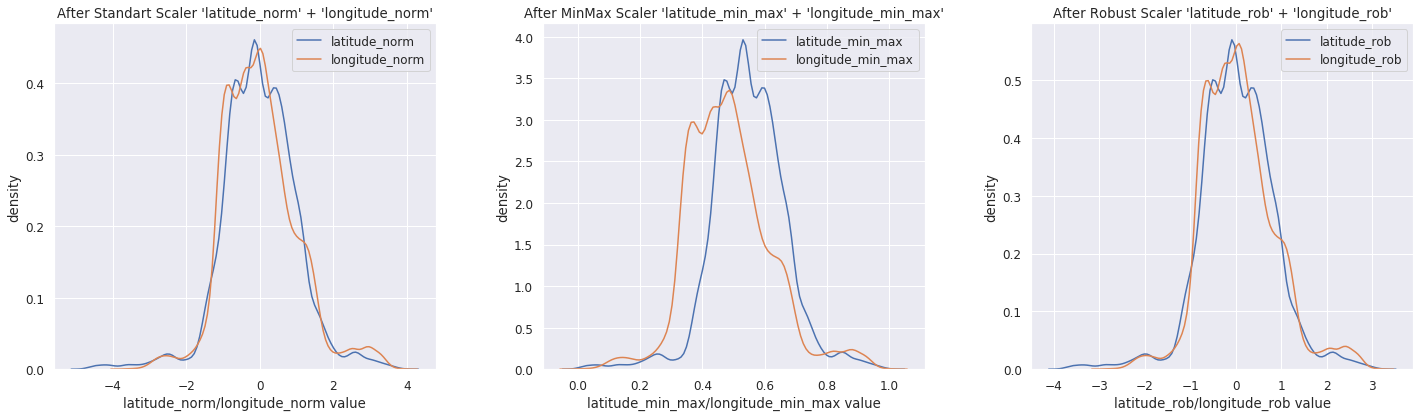

In [97]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 6))

ax1.set_title("After Standart Scaler 'latitude_norm' + 'longitude_norm'")
sns.kdeplot(X_train.latitude_norm, ax=ax1)
sns.kdeplot(X_train.longitude_norm, ax=ax1)
ax1.set(xlabel='latitude_norm/longitude_norm value',ylabel='density')

ax2.set_title("After MinMax Scaler 'latitude_min_max' + 'longitude_min_max'")
sns.kdeplot(X_train.latitude_min_max, ax=ax2)
sns.kdeplot(X_train.longitude_min_max, ax=ax2)
ax2.set(xlabel='latitude_min_max/longitude_min_max value',ylabel='density')

ax3.set_title("After Robust Scaler 'latitude_rob' + 'longitude_rob'")
sns.kdeplot(X_train.latitude_rob, ax=ax3)
sns.kdeplot(X_train.longitude_rob, ax=ax3)
ax3.set(xlabel='latitude_rob/longitude_rob value',ylabel='density')
fig.tight_layout()
plt.show()
#click on the plot twice to see each plot closer

Notice that after Robust scaling, the distributions are brought into the same scale and overlap as on the first plot with Stanart scale, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

Let's go now to binning method

##### 1.2 binning: 

We will take for this `number_of_reviews` feature

Let's see what it is on the plot

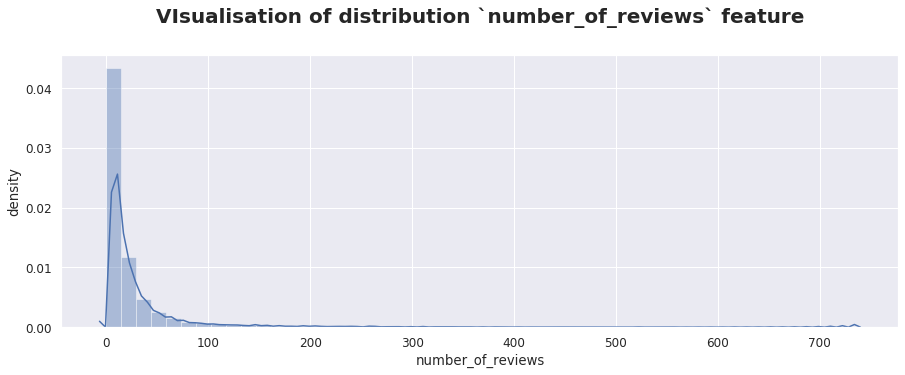

In [98]:
plt.figure(figsize=(15,5))
sns.distplot(X_train.number_of_reviews)
plt.xlabel('number_of_reviews')
plt.ylabel('density')
plt.title('VIsualisation of distribution `number_of_reviews` feature',fontsize=20, fontweight='bold',y=1.1)
plt.show()

Here we have positive exponential distribution with the long `tail` (as all our data in the data set)

We will use `srategy=kmeans`, so values in each bin will have the same nearest center of a 1D k-means cluster

In [99]:
reviews = X_train[['number_of_reviews']]
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
reviews_bins = pd.DataFrame(est.fit_transform(reviews),columns = ['reviews_bin'])
reviews_bins


,reviews_bin
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
15690,0.0
15691,0.0
15692,0.0
15693,0.0


Add a column into our `X_train` data set


In [100]:
X_train['reviews_bin'] = reviews_bins.reviews_bin.tolist()
X_train.reviews_bin.unique()

array([1., 0., 2., 4., 5., 3., 7., 6., 9., 8.])

Replace values with numbers without zero, starting from `1` (much pleasant to see on the plot)

In [101]:
d = {0: 1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10}
X_train['reviews_bin'].replace(d, inplace=True)

Change the type of new column into int and check for Nulls

In [102]:
X_train['reviews_bin'] = X_train.reviews_bin.astype(int)
X_train.reviews_bin.isna().sum(), reviews_bins.reviews_bin.isna().sum()

(0, 0)

Visual check of out data set

In [103]:
X_train.head()

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room,latitude_norm,longitude_norm,latitude_min_max,longitude_min_max,latitude_rob,longitude_rob,reviews_bin
12384,52.37425,4.82007,1.0,100.0,23,95.00000,95.0,0,1,0,0.555576,-1.937963,0.612424,0.226049,0.483709,-1.482452,2
14872,52.35326,4.89102,3.0,80.0,4,95.00000,285.0,1,0,0,-0.746150,0.041215,0.461156,0.490532,-0.568421,0.093514,1
3245,52.38235,4.88150,2.0,0.0,23,100.00000,150.0,1,0,0,1.057909,-0.224349,0.670799,0.455044,0.889724,-0.117948,2
17907,52.31144,4.95773,3.0,80.0,4,90.00000,80.0,1,0,0,-3.339677,1.902117,0.159772,0.739208,-2.664662,1.575300,1
18920,52.35446,4.88144,1.0,36.0,0,94.95681,275.0,1,0,0,-0.671730,-0.226023,0.469804,0.454820,-0.508271,-0.119280,1


Now we can plot and see, that the distribution kept the form even with binning in 10 bins

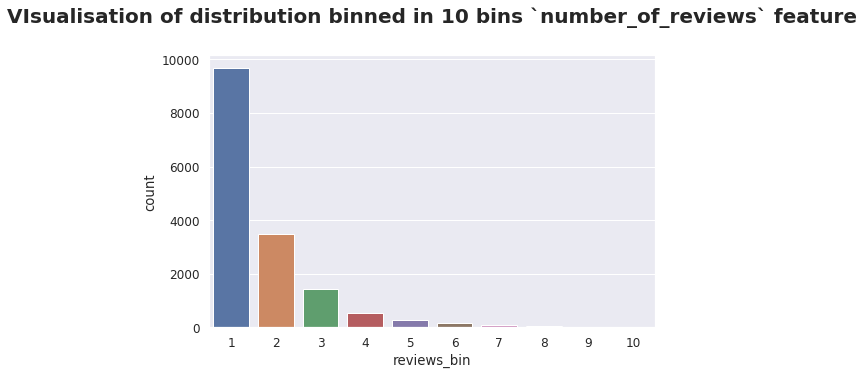

In [104]:
plt.figure(figsize=(8,5))
sns.countplot(X_train.reviews_bin)
plt.title('VIsualisation of distribution binned in 10 bins `number_of_reviews` feature',fontsize=20, fontweight='bold',y=1.1)
plt.show()

##### 1.3 transformations:


At first we will look at the feature distribution before we will transform it (to remember it what it was before we'll lose it) #joking - we won't drop any column in this task any more

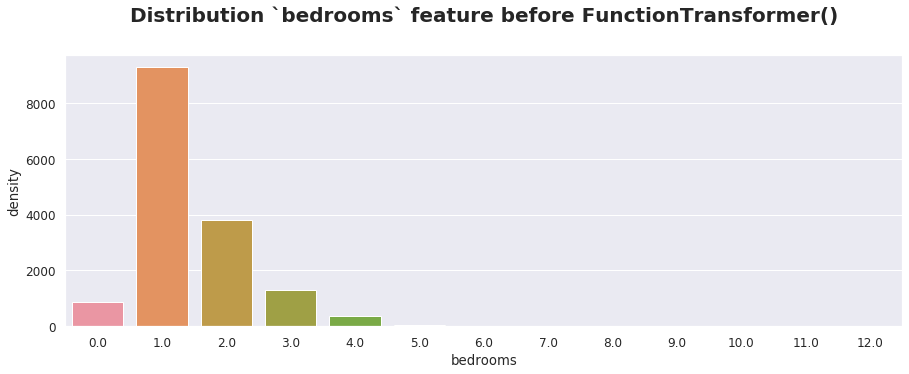

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.bedrooms)
plt.xlabel('bedrooms')
plt.ylabel('density')
plt.title('Distribution `bedrooms` feature before FunctionTransformer()',fontsize=20, fontweight='bold',y=1.1)
plt.show()


And again we have  a lot of outliers, but let's continue and will call for the FunctionTransformer

In [106]:
bedr = X_train[['bedrooms']]

transformer = preprocessing.FunctionTransformer(np.log1p, validate=True)
bedrooms_trans = pd.DataFrame(transformer.transform(bedr), columns = ['bedr'])

In [107]:
X_train['bedrooms_trans'] = bedrooms_trans.bedr.tolist()

In [108]:
display(X_train.reviews_bin.isna().sum(), reviews_bins.reviews_bin.isna().sum())
X_train.head()

0

0

,latitude,longitude,bedrooms,host_response_rate,number_of_reviews,review_scores_rating,price,entire_home_apt,private_room,shared_room,latitude_norm,longitude_norm,latitude_min_max,longitude_min_max,latitude_rob,longitude_rob,reviews_bin,bedrooms_trans
12384,52.37425,4.82007,1.0,100.0,23,95.00000,95.0,0,1,0,0.555576,-1.937963,0.612424,0.226049,0.483709,-1.482452,2,0.693147
14872,52.35326,4.89102,3.0,80.0,4,95.00000,285.0,1,0,0,-0.746150,0.041215,0.461156,0.490532,-0.568421,0.093514,1,1.386294
3245,52.38235,4.88150,2.0,0.0,23,100.00000,150.0,1,0,0,1.057909,-0.224349,0.670799,0.455044,0.889724,-0.117948,2,1.098612
17907,52.31144,4.95773,3.0,80.0,4,90.00000,80.0,1,0,0,-3.339677,1.902117,0.159772,0.739208,-2.664662,1.575300,1,1.386294
18920,52.35446,4.88144,1.0,36.0,0,94.95681,275.0,1,0,0,-0.671730,-0.226023,0.469804,0.454820,-0.508271,-0.119280,1,0.693147


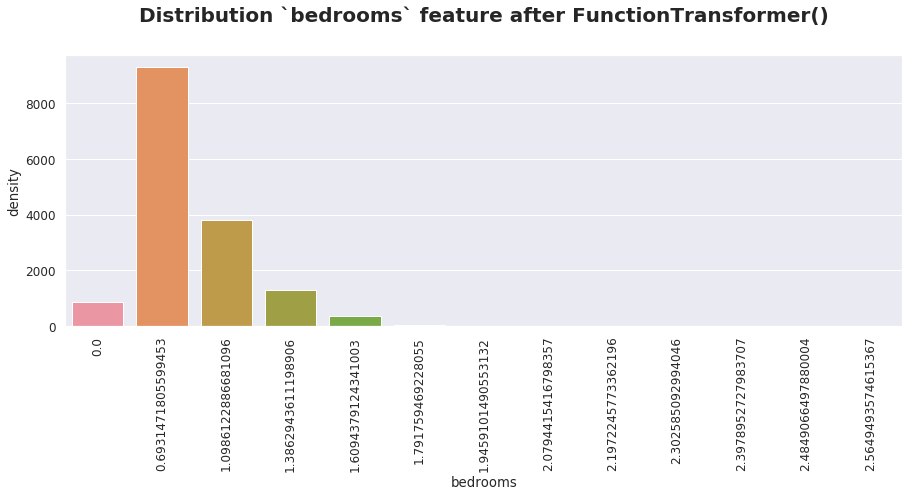

In [109]:
plt.figure(figsize=(15,5))
sns.countplot(X_train.bedrooms_trans)
plt.xlabel('bedrooms')
plt.ylabel('density')
plt.xticks(rotation=90)
plt.title('Distribution `bedrooms` feature after FunctionTransformer()',fontsize=20, fontweight='bold',y=1.1)
plt.show()

We see that the distribution is the same after transformation

 
### On your test set
#### 4. Transform the continuous features in the test set, according to the train set. 

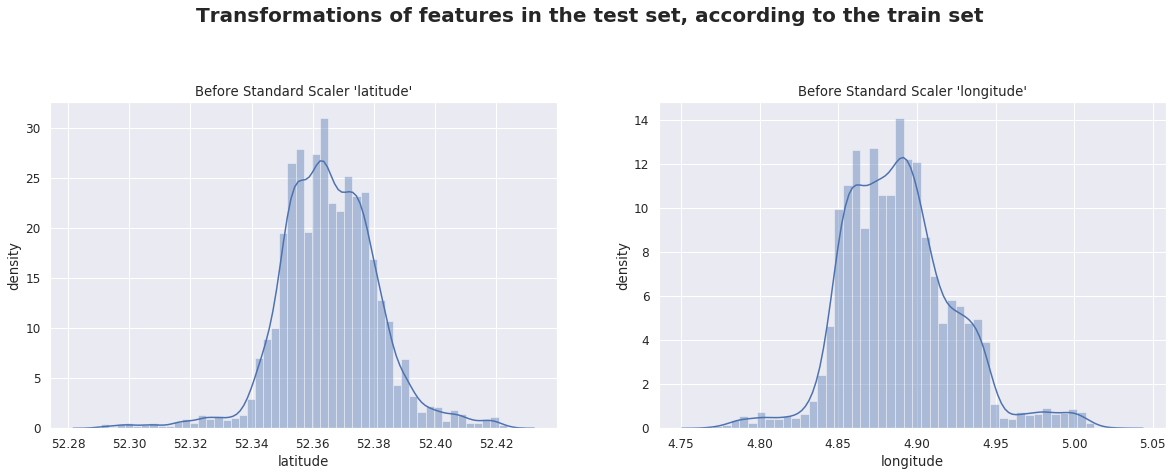

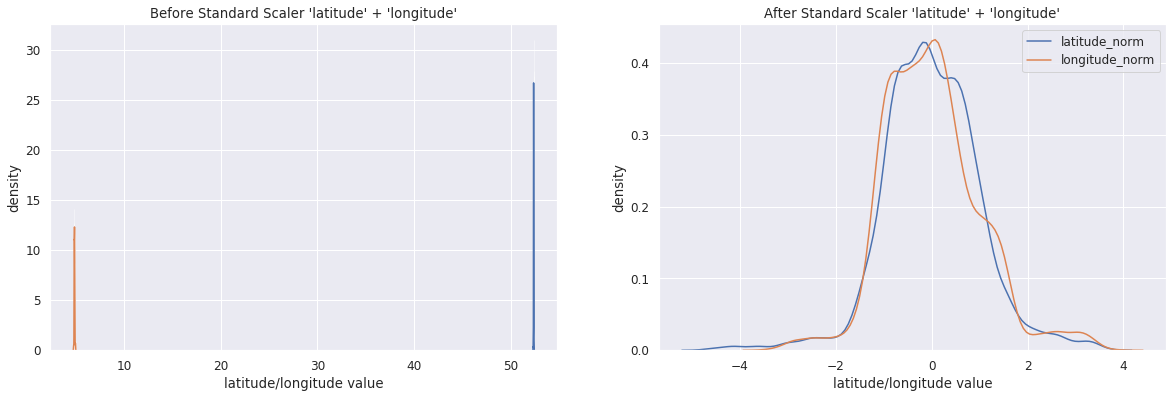

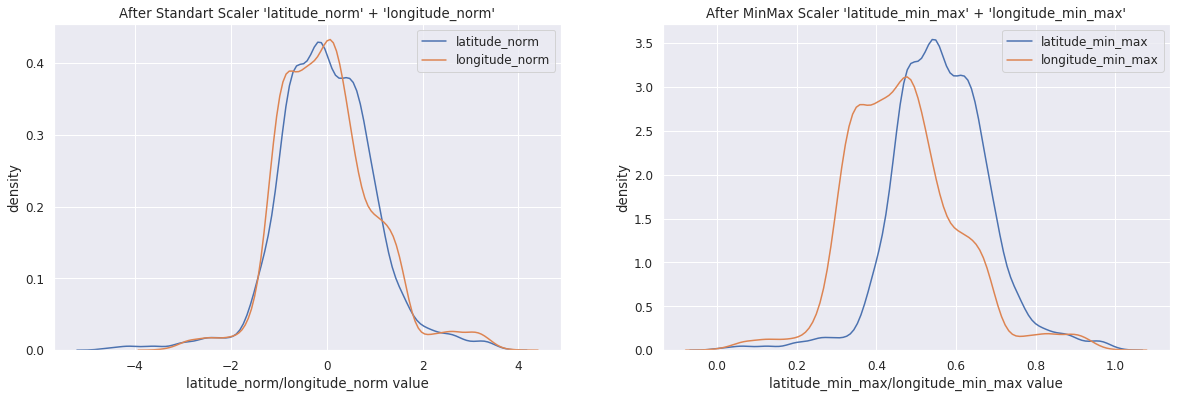

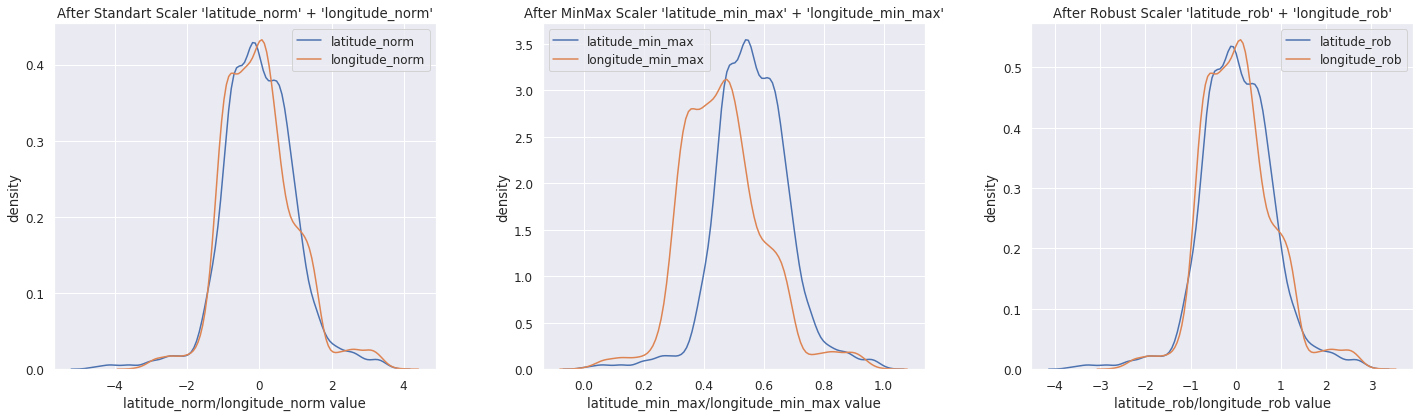

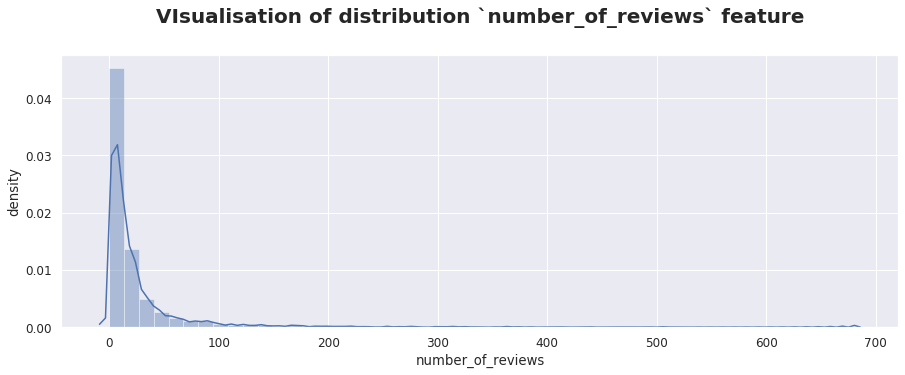

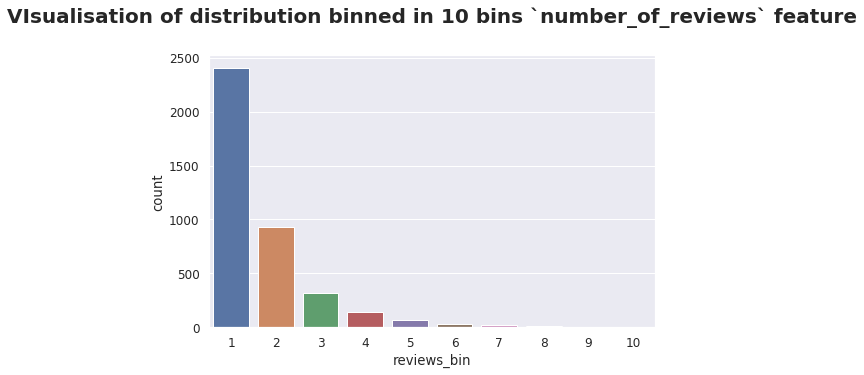

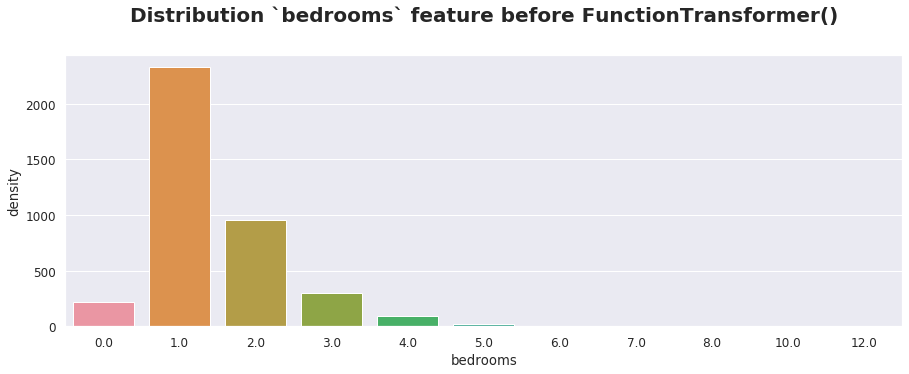

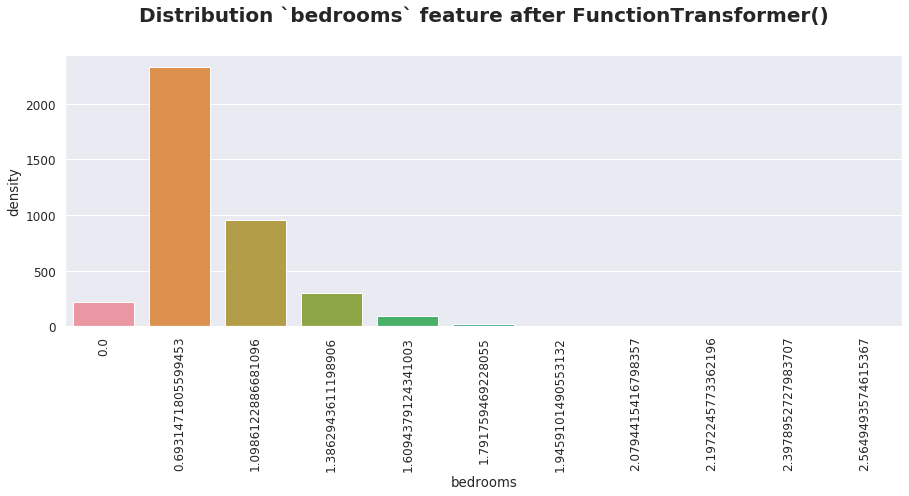

In [110]:
#nornalisation with StandardScaler() 'latitude','longitude'
geopoint = X_test[['latitude','longitude']]
geopoint_normal= preprocessing.StandardScaler().fit(geopoint).transform(geopoint)
geopoint_normal = pd.DataFrame(geopoint_normal, columns = ['latitude', 'longitude'])
X_test['latitude_norm'] = geopoint_normal.latitude.tolist()
X_test['longitude_norm'] = geopoint_normal.longitude.tolist()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
fig.suptitle("Transformations of features in the test set, according to the train set",fontsize=20, fontweight='bold',y=1.1)
ax1.set_title("Before Standard Scaler 'latitude'")
sns.distplot(X_test.latitude, ax=ax1)
ax1.set(ylabel='density')
ax2.set_title("Before Standard Scaler 'longitude'")
sns.distplot(X_test.longitude, ax=ax2)
ax2.set(ylabel='density')
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
ax1.set_title("Before Standard Scaler 'latitude' + 'longitude'")
sns.distplot(X_test.latitude, ax=ax1)
sns.distplot(X_test.longitude, ax=ax1)
ax1.set(xlabel='latitude/longitude value',ylabel='density')
ax2.set_title("After Standard Scaler 'latitude' + 'longitude'")
sns.kdeplot(X_test.latitude_norm, ax=ax2)
sns.kdeplot(X_test.longitude_norm, ax=ax2)
ax2.set(xlabel='latitude/longitude value',ylabel='density')
plt.show()


#MinMaxScaler() 'latitude','longitude'
geopoint_min_max= preprocessing.MinMaxScaler().fit(geopoint).transform(geopoint)
geopoint_min_max = pd.DataFrame(geopoint_min_max, columns = ['latitude', 'longitude'])
X_test['latitude_min_max'] = geopoint_min_max.latitude.tolist()
X_test['longitude_min_max'] = geopoint_min_max.longitude.tolist()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
ax1.set_title("After Standart Scaler 'latitude_norm' + 'longitude_norm'")
sns.kdeplot(X_test.latitude_norm, ax=ax1)
sns.kdeplot(X_test.longitude_norm, ax=ax1)
ax1.set(xlabel='latitude_norm/longitude_norm value',ylabel='density')
ax2.set_title("After MinMax Scaler 'latitude_min_max' + 'longitude_min_max'")
sns.kdeplot(X_test.latitude_min_max, ax=ax2)
sns.kdeplot(X_test.longitude_min_max, ax=ax2)
ax2.set(xlabel='latitude_min_max/longitude_min_max value',ylabel='density')
plt.show()


#RobustScaler() 'latitude','longitude'
geopoint_rob = preprocessing.RobustScaler().fit(geopoint).transform(geopoint)
geopoint_rob = pd.DataFrame(geopoint_rob, columns = ['latitude', 'longitude'])
X_test['latitude_rob'] = geopoint_rob.latitude.tolist()
X_test['longitude_rob'] = geopoint_rob.longitude.tolist()

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 6))
ax1.set_title("After Standart Scaler 'latitude_norm' + 'longitude_norm'")
sns.kdeplot(X_test.latitude_norm, ax=ax1)
sns.kdeplot(X_test.longitude_norm, ax=ax1)
ax1.set(xlabel='latitude_norm/longitude_norm value',ylabel='density')
ax2.set_title("After MinMax Scaler 'latitude_min_max' + 'longitude_min_max'")
sns.kdeplot(X_test.latitude_min_max, ax=ax2)
sns.kdeplot(X_test.longitude_min_max, ax=ax2)
ax2.set(xlabel='latitude_min_max/longitude_min_max value',ylabel='density')
ax3.set_title("After Robust Scaler 'latitude_rob' + 'longitude_rob'")
sns.kdeplot(X_test.latitude_rob, ax=ax3)
sns.kdeplot(X_test.longitude_rob, ax=ax3)
ax3.set(xlabel='latitude_rob/longitude_rob value',ylabel='density')
fig.tight_layout()
plt.show()


# binning `number_of_reviews` with KBinsDiscretizer()
plt.figure(figsize=(15,5))
sns.distplot(X_test.number_of_reviews)
plt.xlabel('number_of_reviews')
plt.ylabel('density')
plt.title('VIsualisation of distribution `number_of_reviews` feature',fontsize=20, fontweight='bold',y=1.1)
plt.show()

reviews = X_test[['number_of_reviews']]
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
reviews_bins = pd.DataFrame(est.fit_transform(reviews),columns = ['reviews_bin'])
X_test['reviews_bin'] = reviews_bins.reviews_bin.tolist()
d = {0: 1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10}
X_test['reviews_bin'].replace(d, inplace=True)
X_test['reviews_bin'] = X_test.reviews_bin.astype(int)

plt.figure(figsize=(8,5))
sns.countplot(X_test.reviews_bin)
plt.title('VIsualisation of distribution binned in 10 bins `number_of_reviews` feature',fontsize=20, fontweight='bold',y=1.1)
plt.show()


#`FunctionTransformer() bedrooms`
plt.figure(figsize=(15,5))
sns.countplot(X_test.bedrooms)
plt.xlabel('bedrooms')
plt.ylabel('density')
plt.title('Distribution `bedrooms` feature before FunctionTransformer()',fontsize=20, fontweight='bold',y=1.1)
plt.show()

bedr = X_test[['bedrooms']]
transformer = preprocessing.FunctionTransformer(np.log1p, validate=True)
bedrooms_trans = pd.DataFrame(transformer.transform(bedr), columns = ['bedr'])
X_test['bedrooms_trans'] = bedrooms_trans.bedr.tolist()

plt.figure(figsize=(15,5))
sns.countplot(X_test.bedrooms_trans)
plt.xlabel('bedrooms')
plt.ylabel('density')
plt.xticks(rotation=90)
plt.title('Distribution `bedrooms` feature after FunctionTransformer()',fontsize=20, fontweight='bold',y=1.1)
plt.show()

We see that all transformations are the same both for train set and for test set

All proportions are kept,  as well names and shapes

<div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>